In [1]:
#code for running a loop for all images of same type
#BE CAREFUL RESOLUTION IS WRONG AND ROTATION FLIPPIND ETC
from skimage import io, exposure
import os
import matplotlib.pyplot as plt

from PIL import Image
from PIL.TiffTags import TAGS

import numpy as np

from scipy.ndimage import gaussian_filter, sobel

from skimage import morphology

import glob

import cv2


In [2]:
def local_variance_filter(image,radius=20):
   # time1 = time.time()
    kernel = morphology.disk(radius)
    variance = np.zeros(image.shape)
    for i in np.arange(radius,image.shape[0]-radius):
        for j in np.arange(radius,image.shape[1]-radius):
            pixels = image[i-radius:i+radius+1,j-radius:j+radius+1] * kernel
            variance[i,j] = np.var(pixels[kernel==1])
   # print(str(time.time()-time1)+" s ")
    return variance

In [3]:
# Getting metadata for small image (resolution)
def get_metadata(im_small):
       
    x_res = 506 
    
    return x_res

In [4]:


def distance_two_images(im1, im2):
    """ the euclidean square distance of two images in terms of intensity is calculated
    :im1 np.array of the big image
    :im2 np.array of the small image   """
    
    (height, width) = np.shape(im1)
    (h, w) = np.shape(im2)
    d = np.empty((height - h, width - w))
    
    for row in range(height - h):
        for col in range(width - w):
            d[row,col] = np.sum( np.square( np.subtract(im1[0+row : h+row, 0+col : w+col] , im2) ))
    
    return d



In [5]:


def position_of_min(d):
    """ determine the position of minimum
    :d np.array of distances """
    
    result = np.where(d == np.amin(d))
    print("the minimum distance is: ", np.amin(d))
    print('Tuple of arrays returned : ', result)
    
    return result



In [6]:
import tifffile as tiff

file = input("list of small images in .txt format: ")
Big = input("name of big image")
im_large= tiff.imread(Big)
all_im_small=[]
all_im_small_np=[]  
with open(file,"r") as fic:
    ret =[ligne.strip(" \n")for ligne in fic]
    print(ret)
    number = len(ret)
    print(number)
                
    
    
    for i,file in enumerate(ret):
        im_small = tiff.imread(file)
        all_im_small.append(im_small)

# loading metadata (small)
        x_res = get_metadata(im_small)

        im_small_np = np.rot90(np.asarray(im_small), k=3)
        im_large_np = np.asarray(im_large)
        all_im_small_np.append(im_small_np)
# dealing with resolution
        px_large = 9.4e-8  #(Hamamatsu camera - for ICM images)
        px_small = 1/float(x_res) * 10**(-2)
        resc_rat = round(px_small/px_large)

        print('\n \n \n Rounded ratio between resolutions: ', round(resc_rat, 4))



#cells = ['qi']
#small_im_type = 'fit' # can be 'TP' for 'topo' or 'YM'
#large_im_type = 'sample' # can be 'BF' or 'IC' for 'ICM'
#data_folder = '/YM/'
#print(len(small_im_type))
px_large = 9.4e-8  #(Hamamatsu camera - for ICM images) - this will determine rescaling (it will be rounded to integer based on the resolution of the small image that is encoded in the tif metadata)

var_filt_radius = 3 # radius for variance filtering
perc_threshold = 90 # percentile threshold for binarsising filtered result


thr_overlay_vis = 5 # threshold for visualising overlay (applied to small image)
#for i in range(1):
 #   for j in range(18):
  #      im_small_filename = glob.glob(os.getcwd() + data_folder + f'{cells[i]}-{small_im_type[j]}*.tif')
   #     im_large_filename = glob.glob(os.getcwd() + data_folder + f'{cells[i]}-{large_im_type}*.tif')
        # loading
      #  im_small = tiff.imread(im_small_filename)
    #    im_large = tiff.imread(im_large_filename)
        



la.lis ls.lis
qi-sampleprojection.tifqi-sampleprojection.tif
['qi-fit-2022.03.22-16.12.07.409.tif', 'qi-fit-2022.03.22-15.15.20.837.tif', 'qi-fit-2022.03.22-16.16.14.138.tif', 'qi-fit-2022.03.22-15.19.34.648.tif', 'qi-fit-2022.03.22-16.21.33.706.tif', 'qi-fit-2022.03.22-15.29.07.658.tif', 'qi-fit-2022.03.22-16.24.23.636.tif', 'qi-fit-2022.03.22-15.37.42.210.tif', 'qi-fit-2022.03.22-16.27.56.739.tif', 'qi-fit-2022.03.22-15.47.32.381.tif', 'qi-fit-2022.03.22-16.30.51.245.tif', 'qi-fit-2022.03.22-15.50.57.904.tif', 'qi-fit-2022.03.22-16.41.07.286.tif', 'qi-fit-2022.03.22-16.01.49.836.tif', 'qi-fit-2022.03.22-16.44.09.941.tif', 'qi-fit-2022.03.22-16.04.36.821.tif', 'qi-fit-2022.03.22-16.49.21.493.tif', 'qi-fit-2022.03.22-16.08.30.654.tif']
18

 
 
 Rounded ratio between resolutions:  210

 
 
 Rounded ratio between resolutions:  210

 
 
 Rounded ratio between resolutions:  210

 
 
 Rounded ratio between resolutions:  210

 
 
 Rounded ratio between resolutions:  210

 
 
 Rounded ratio b

In [7]:
all_im_small

[array([[6.5015607, 6.603913 , 6.4883494, ..., 4.3051925, 4.273358 ,
         4.4979515],
        [6.5801425, 6.6211123, 6.6249213, ..., 4.0805173, 4.199924 ,
         4.35897  ],
        [6.6385293, 6.651814 , 6.673299 , ..., 3.7546651, 3.8153303,
         3.8519032],
        ...,
        [6.8050666, 6.296451 , 4.2113256, ..., 4.8499365, 5.156498 ,
         5.3693666],
        [7.125705 , 6.2881913, 4.197855 , ..., 5.027079 , 5.254625 ,
         5.3339324],
        [7.406421 , 6.142815 , 3.89808  , ..., 5.201858 , 5.2640853,
         4.887648 ]], dtype=float32),
 array([[4.7030077, 4.612826 , 4.5473514, ..., 3.7492187, 3.6447027,
         3.5991867],
        [4.8265452, 4.6987824, 4.6199255, ..., 3.69703  , 3.615653 ,
         3.5890152],
        [4.933766 , 4.796861 , 4.72866  , ..., 3.6875968, 3.6404803,
         3.5982745],
        ...,
        [5.6443734, 5.720378 , 5.7833223, ..., 3.4856944, 3.3923874,
         3.2036862],
        [5.665585 , 5.699732 , 5.7566032, ..., 3.463283 ,

/tmp/ipykernel_62152/592870153.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _,axs = plt.subplots(1,2, figsize=(10,20), dpi=300)


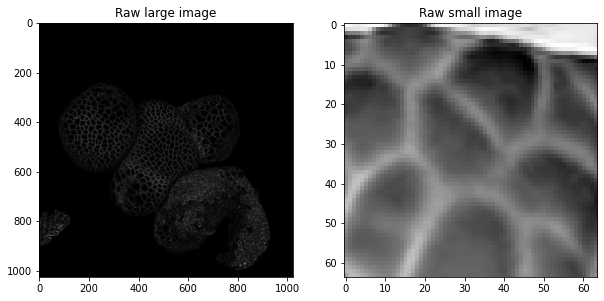

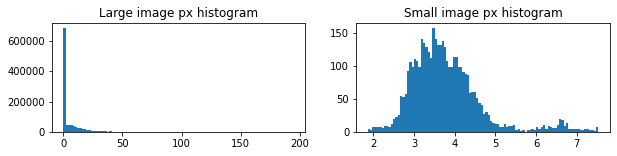

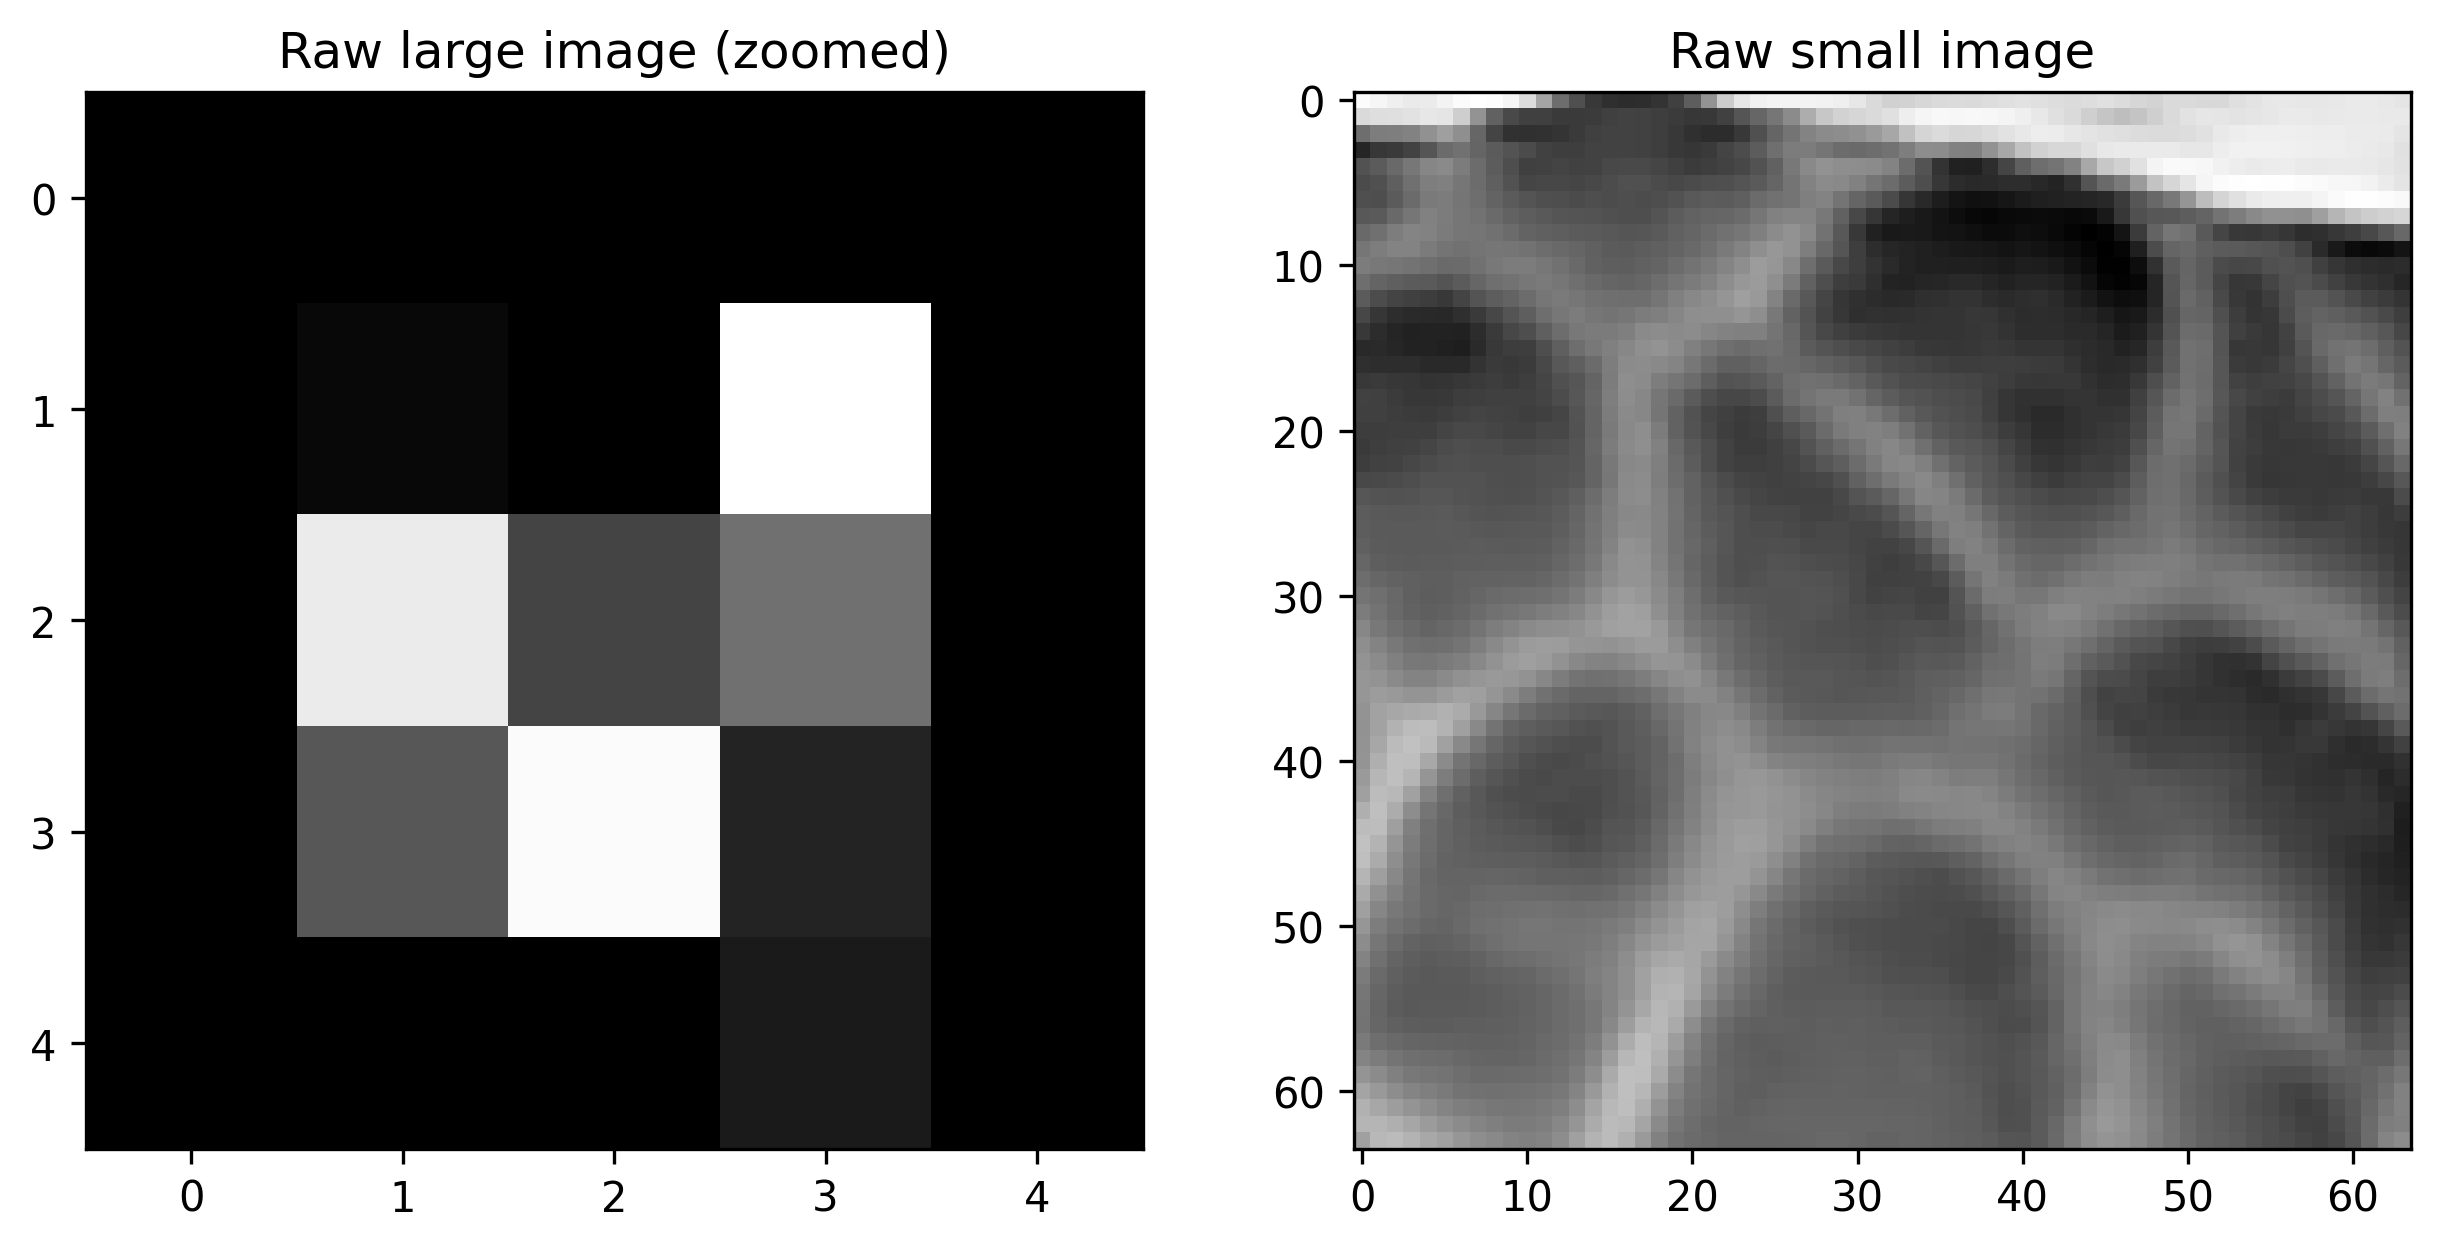

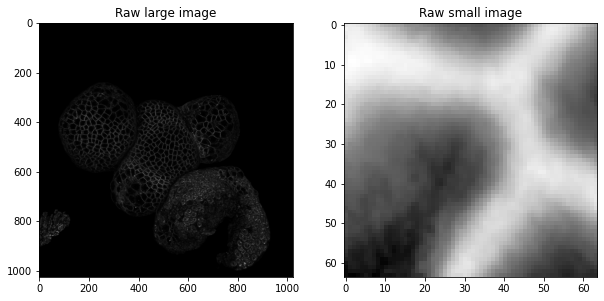

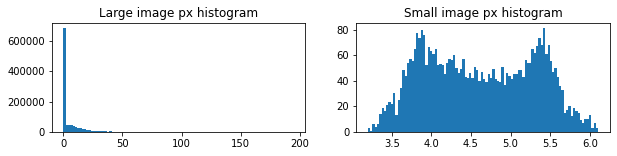

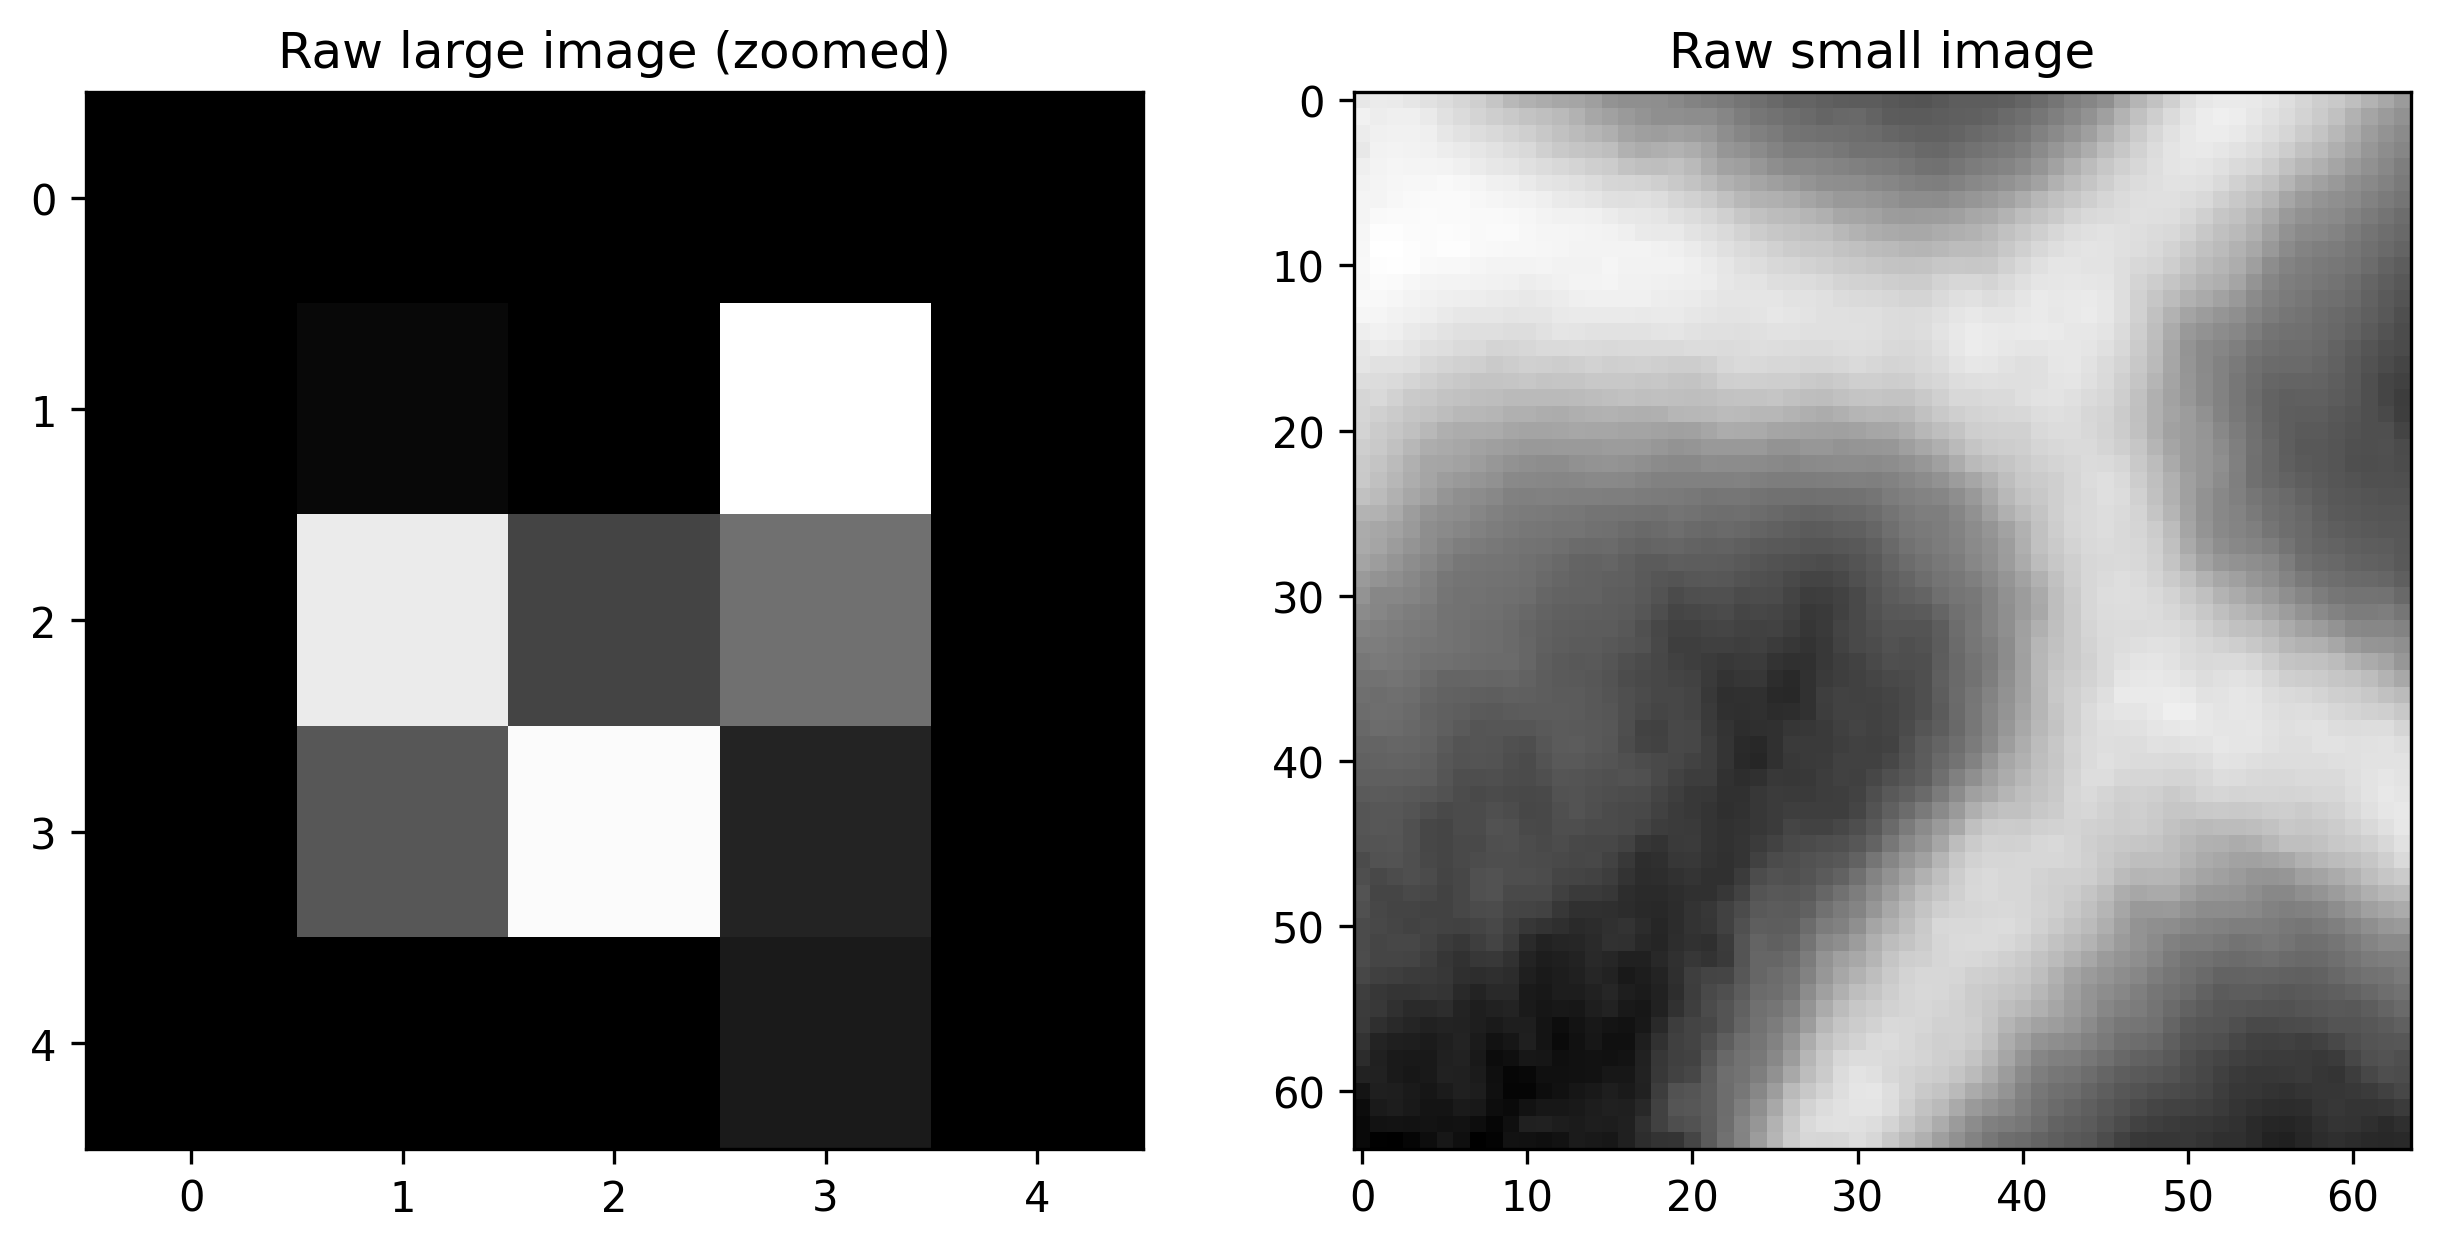

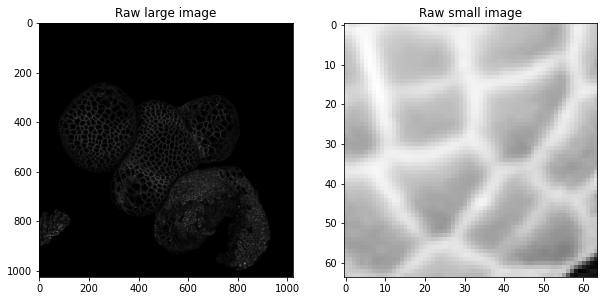

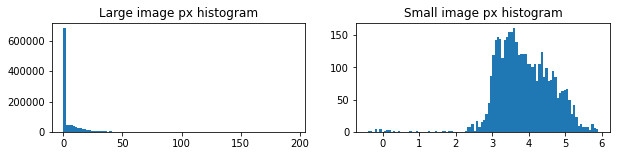

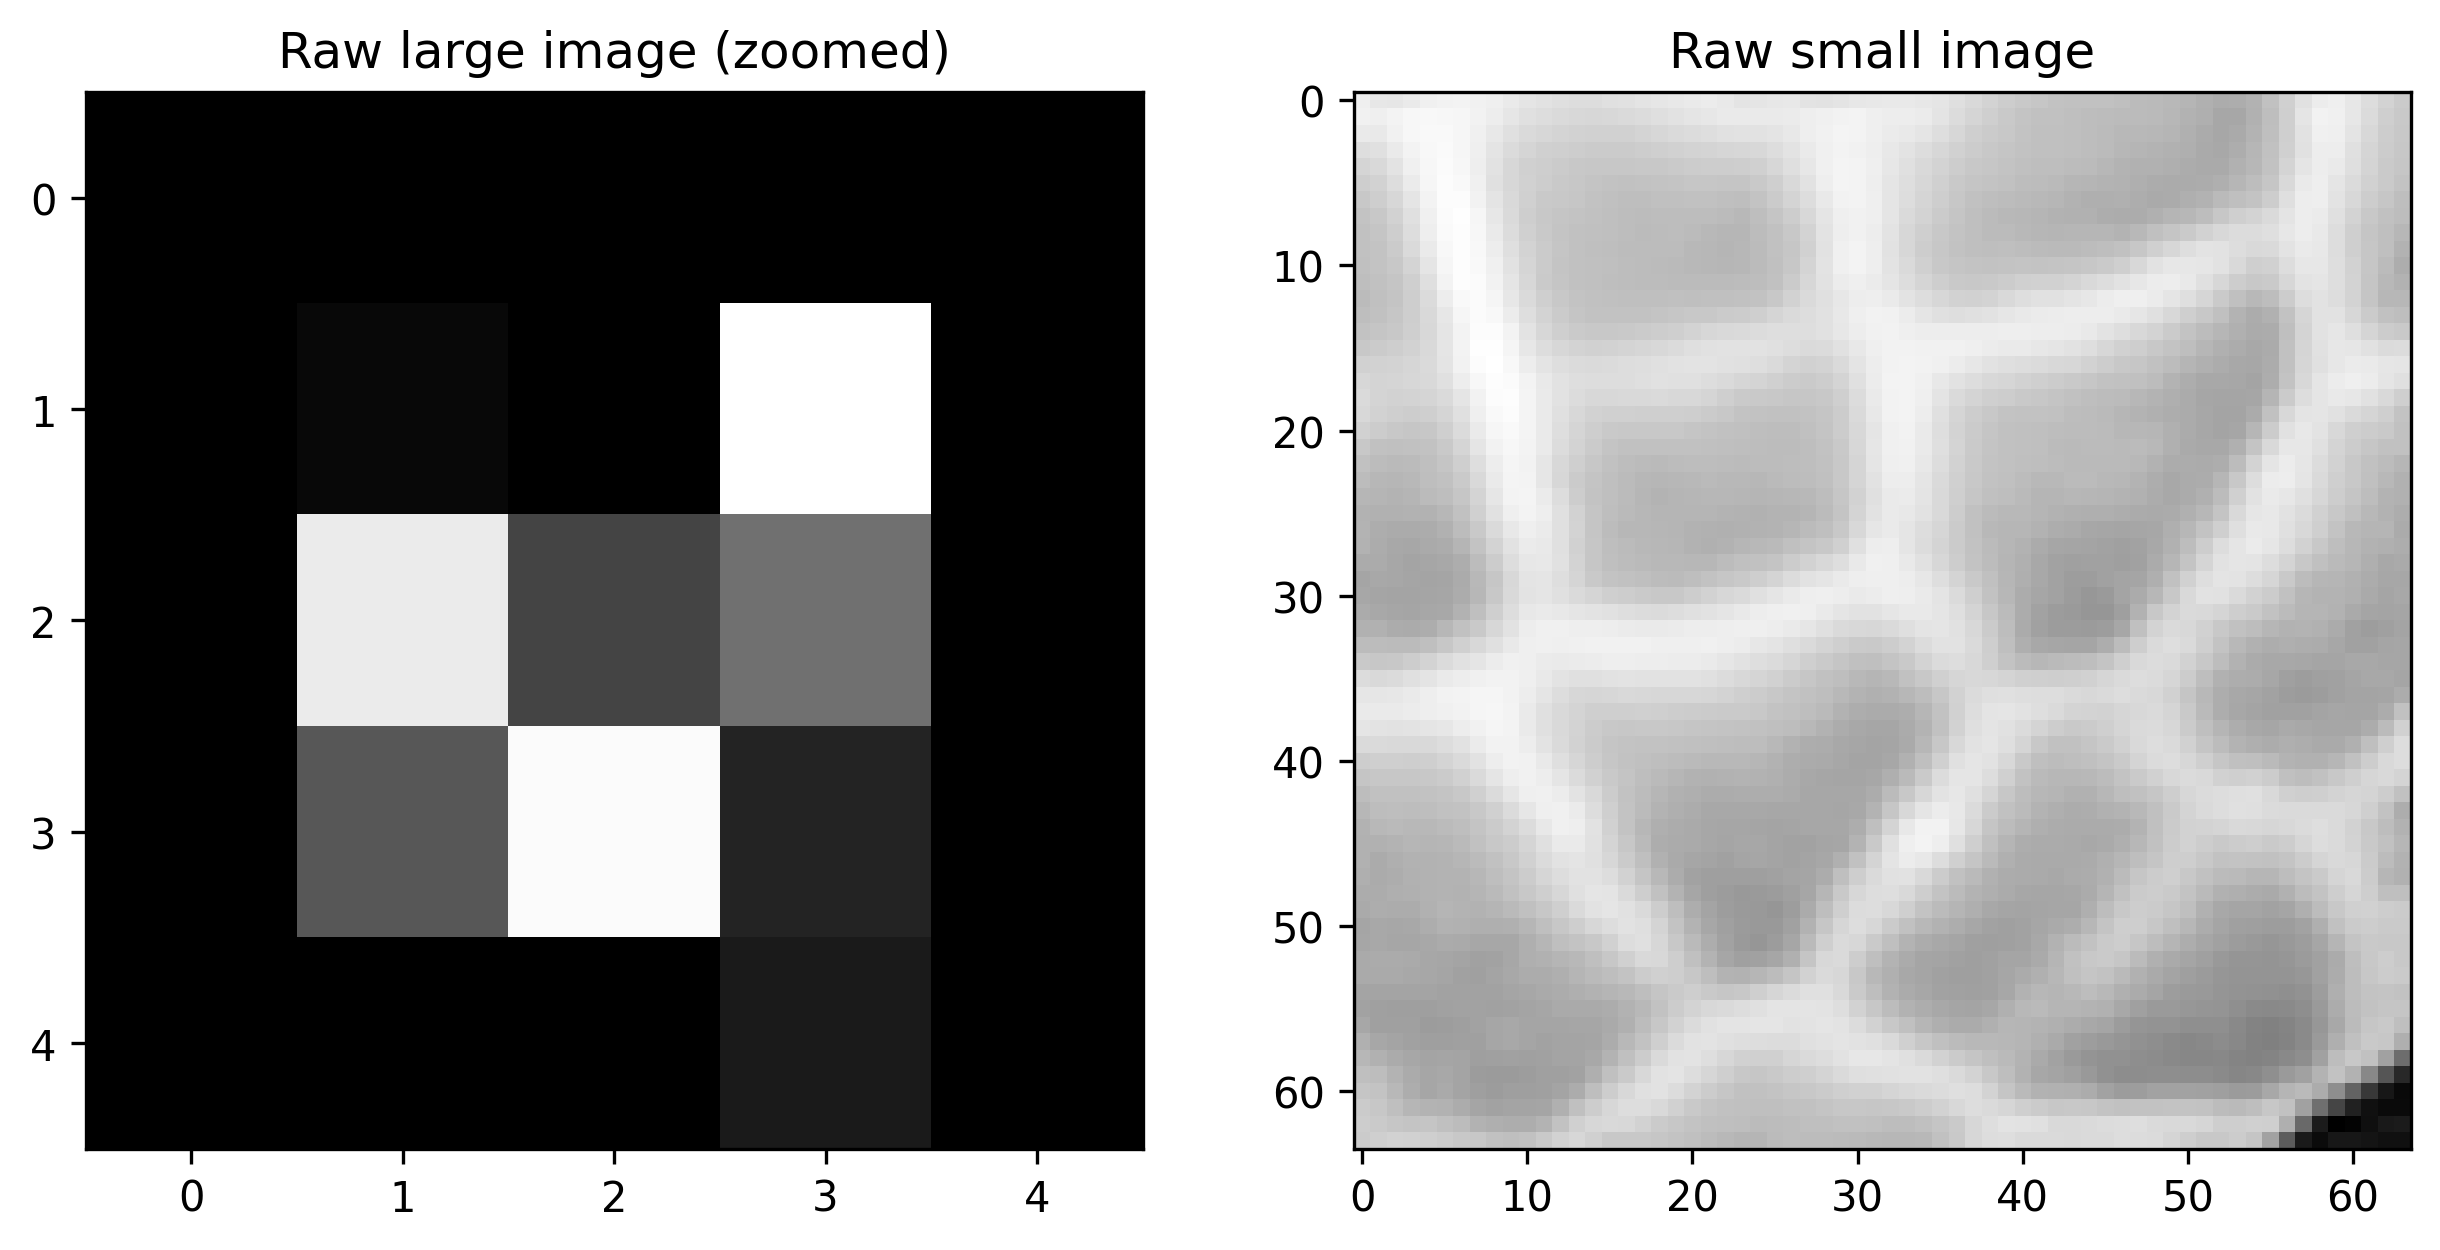

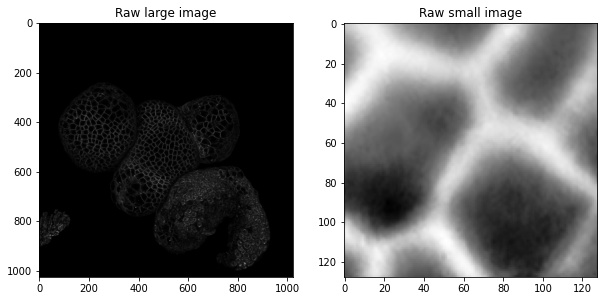

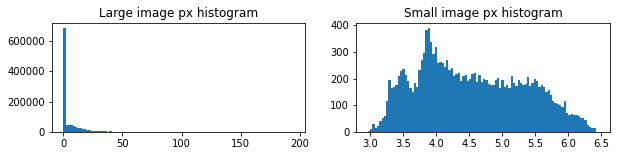

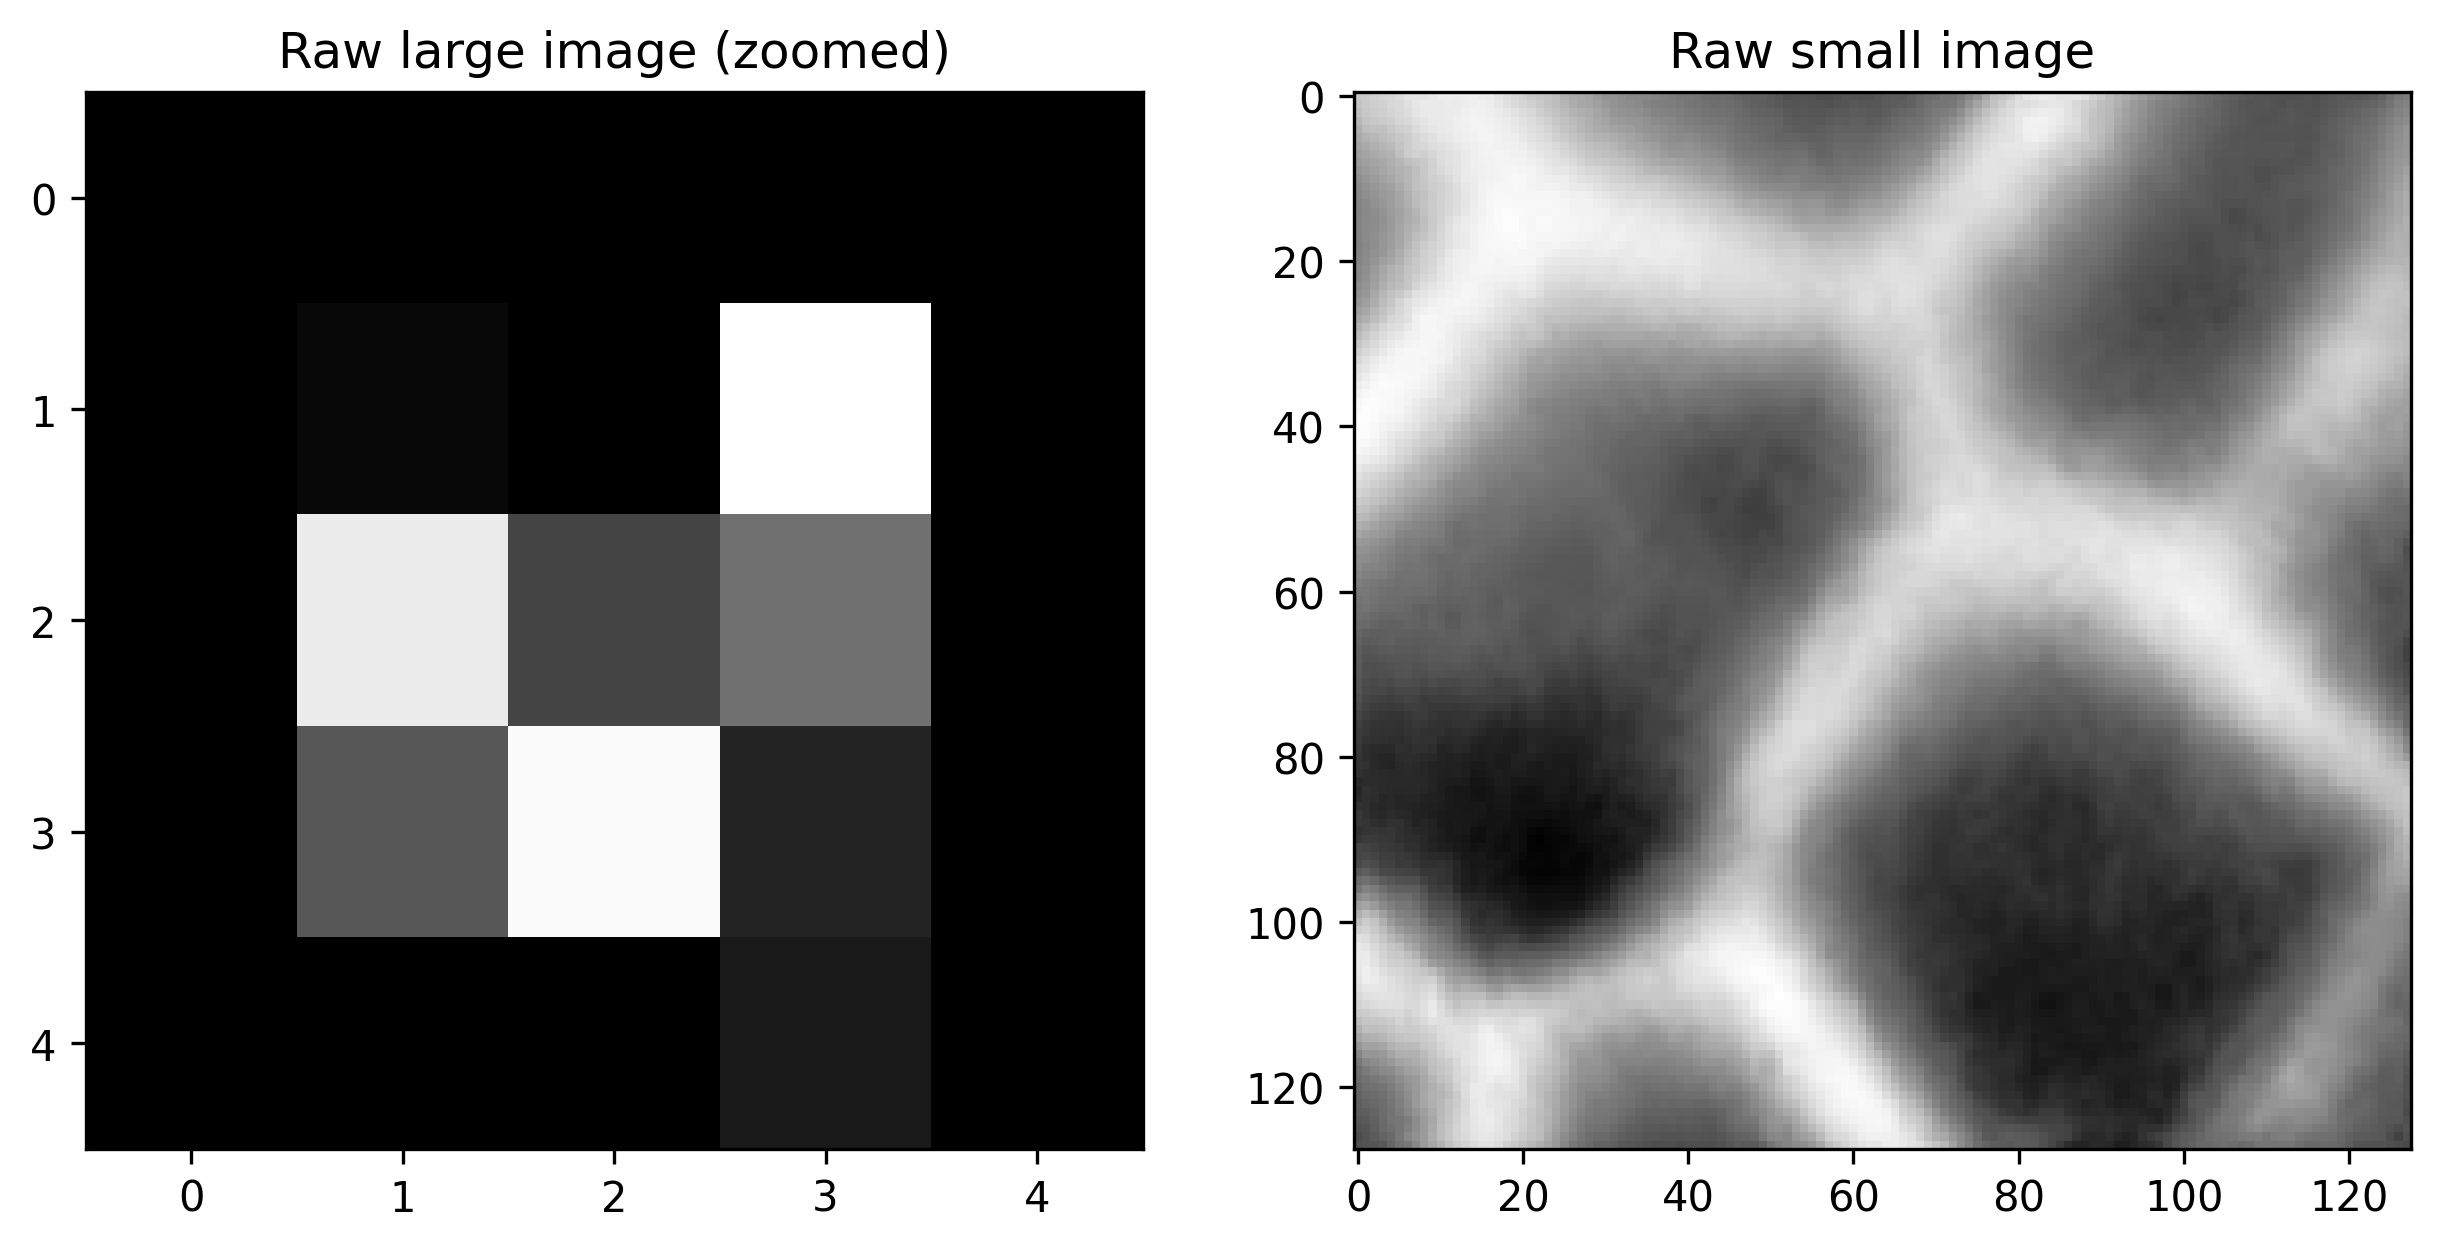

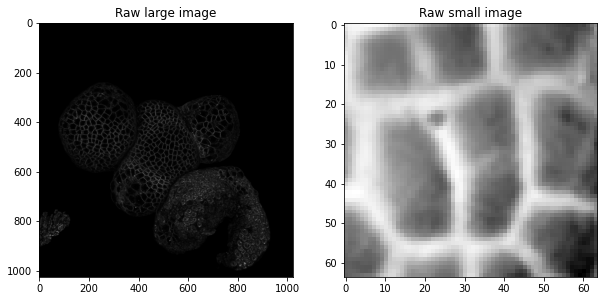

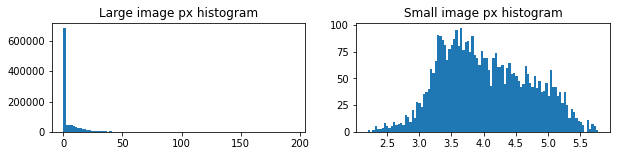

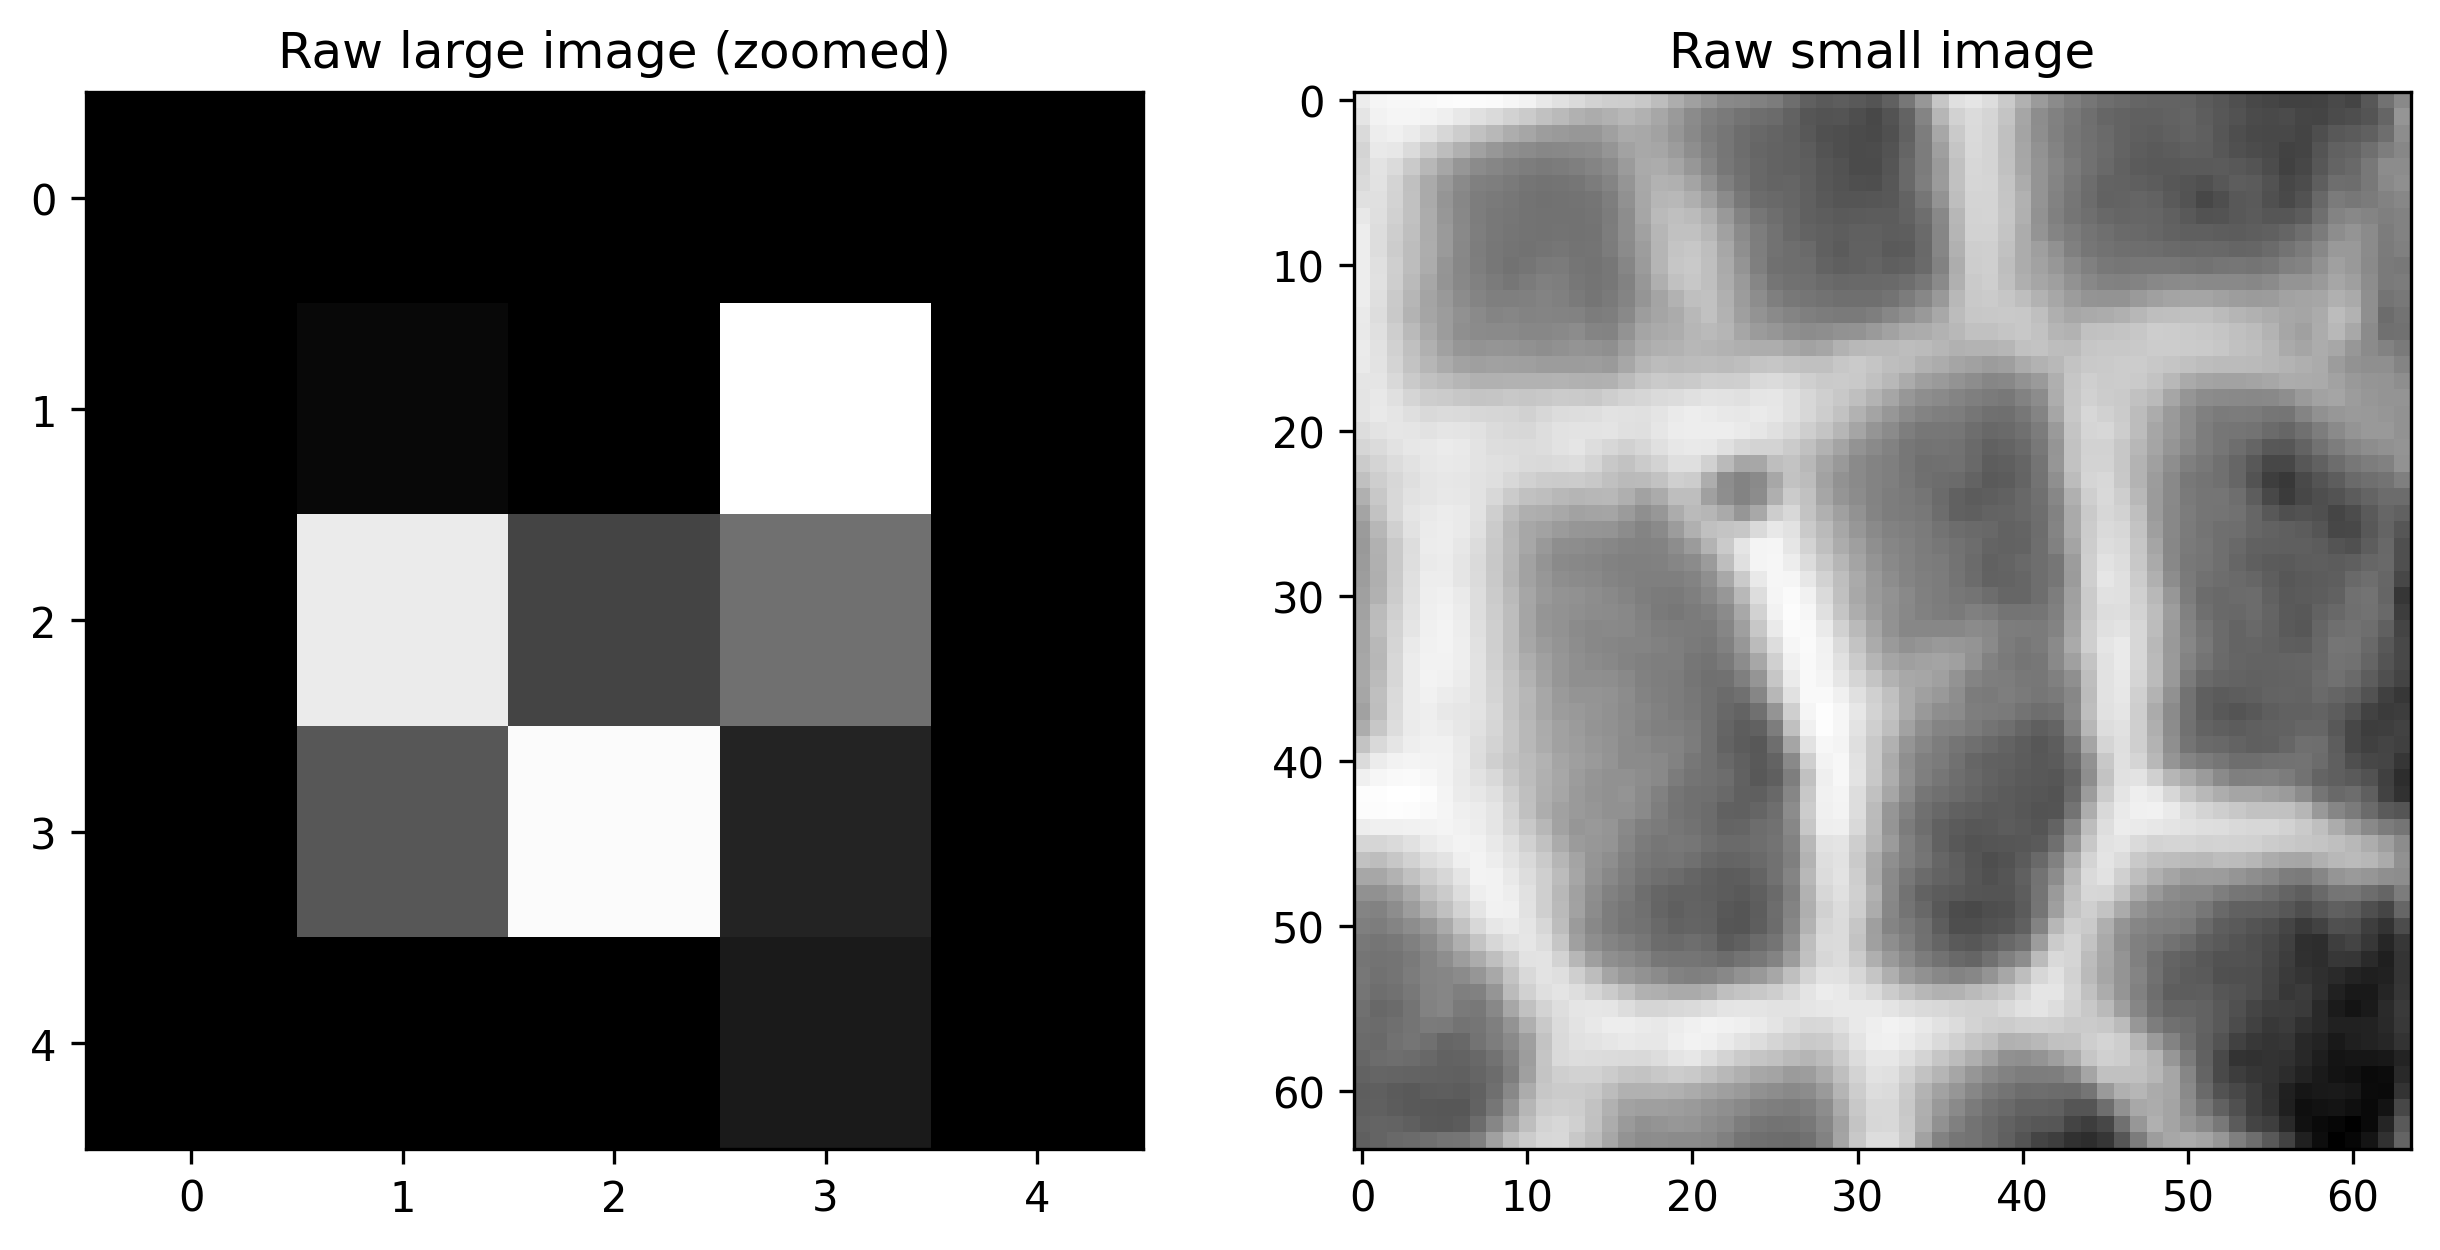

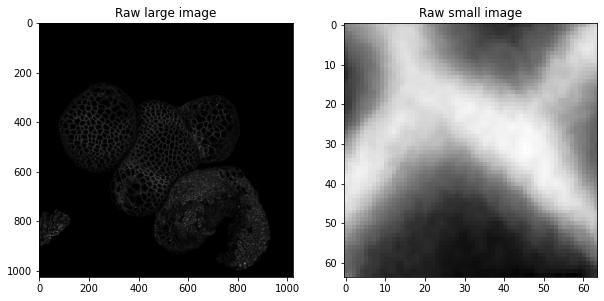

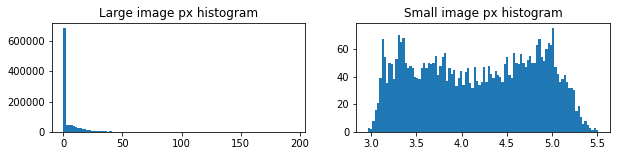

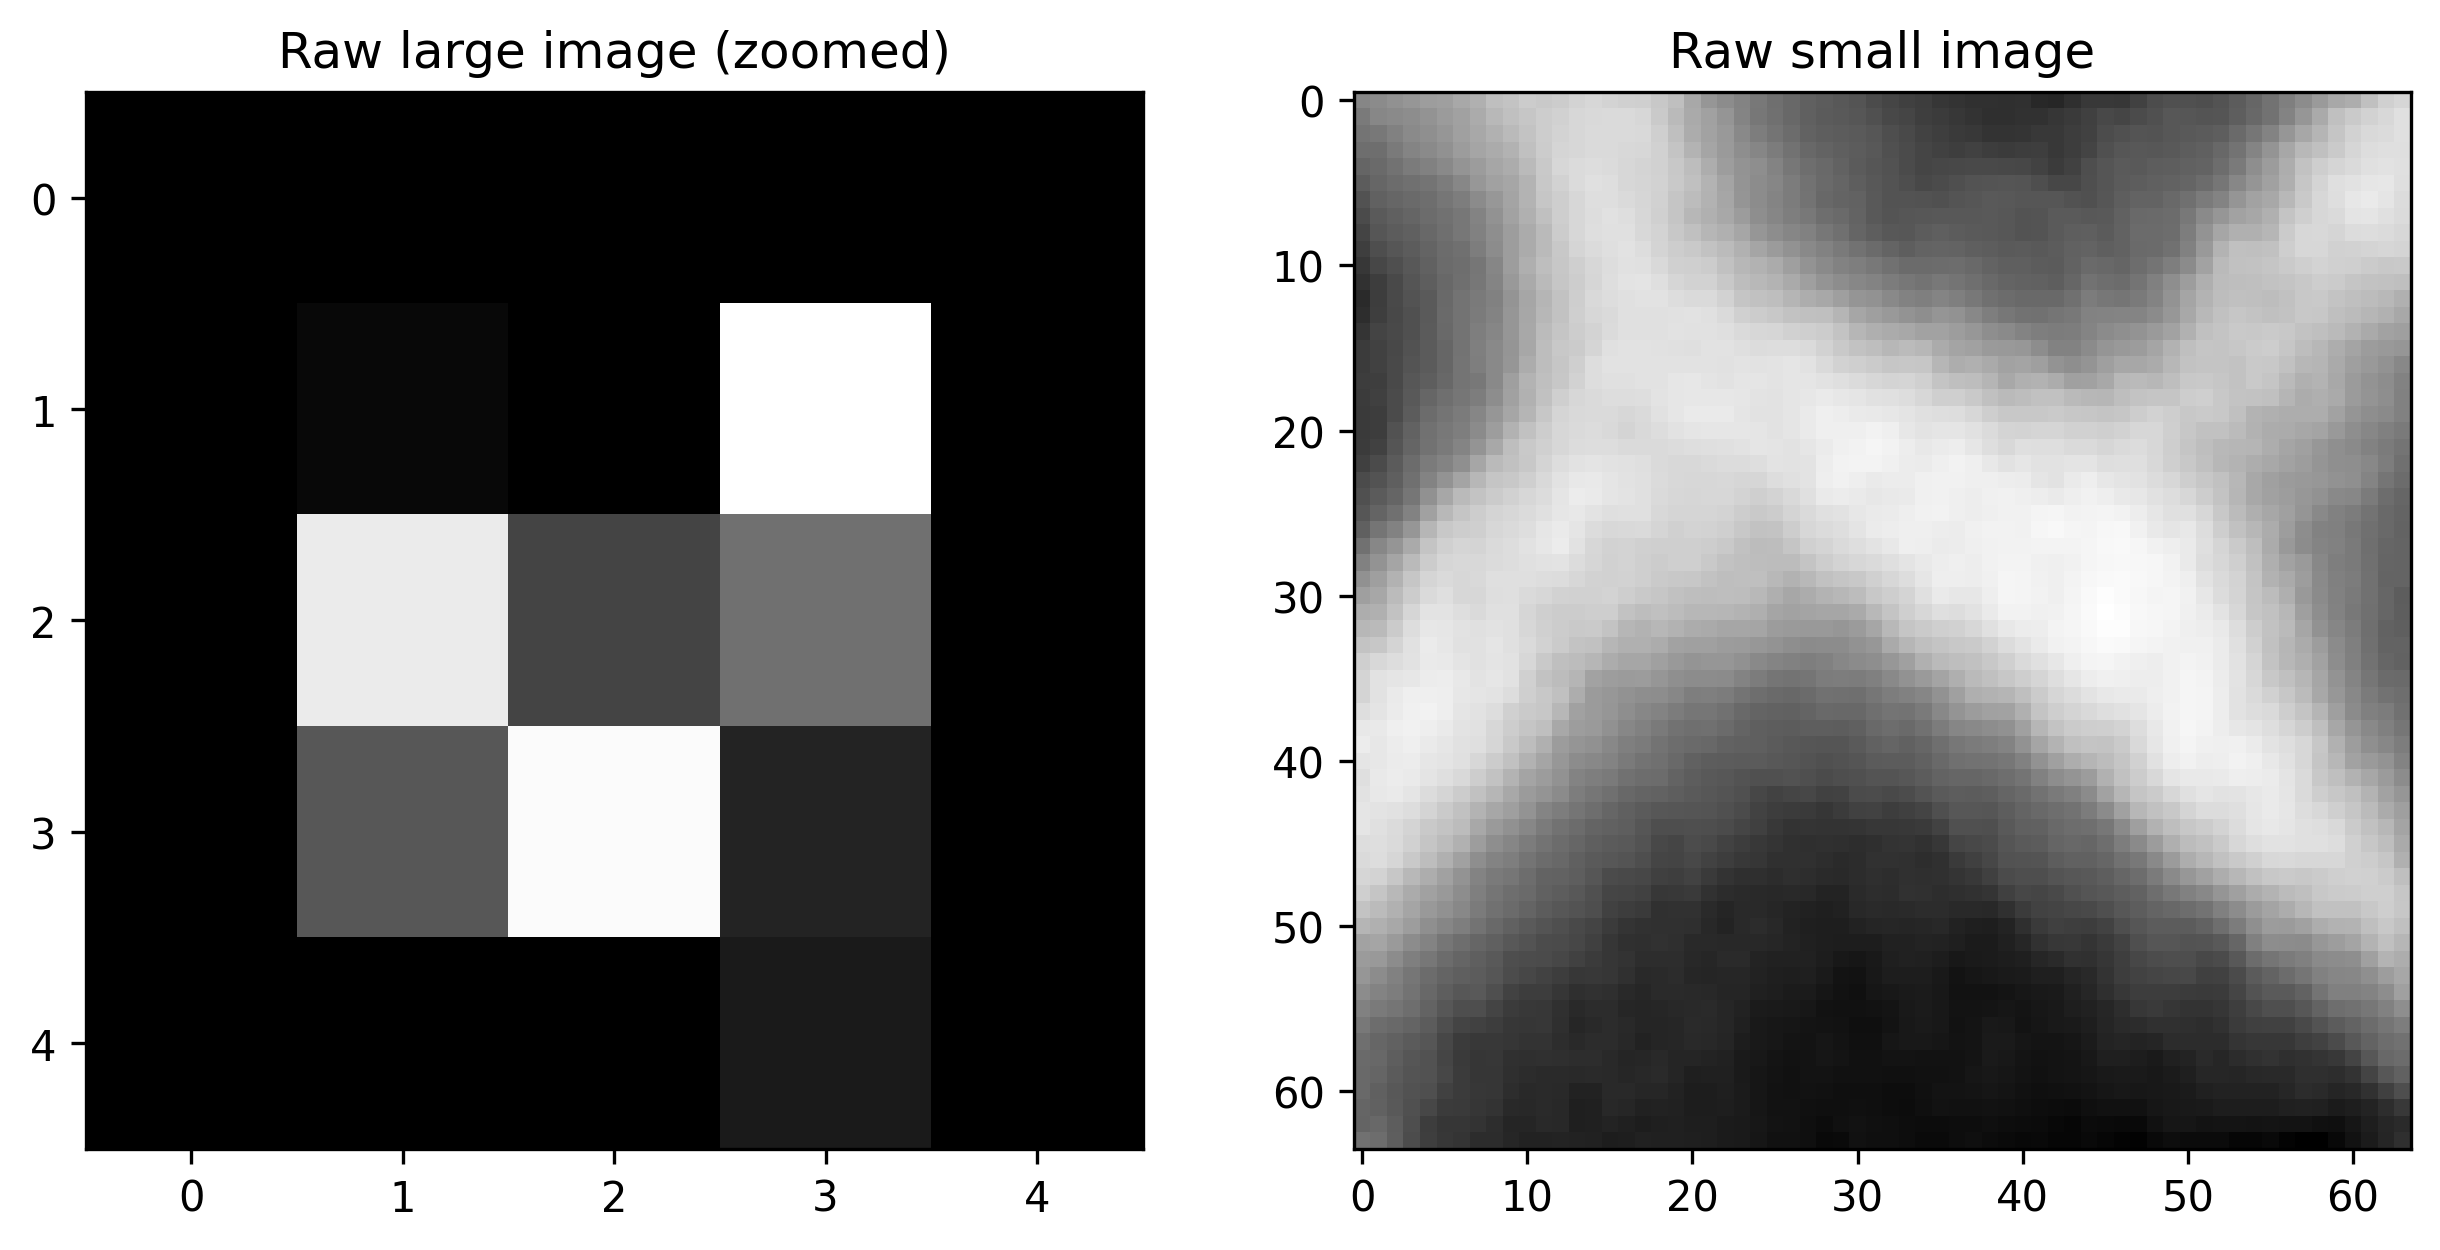

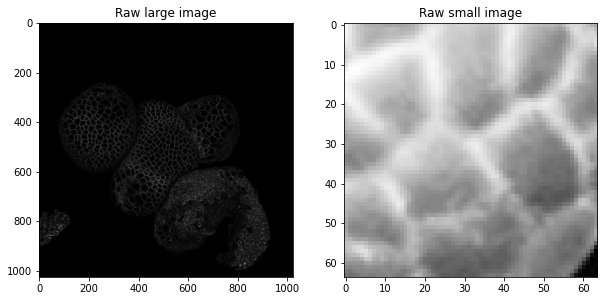

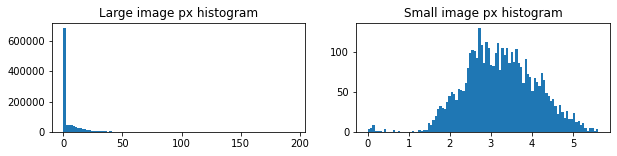

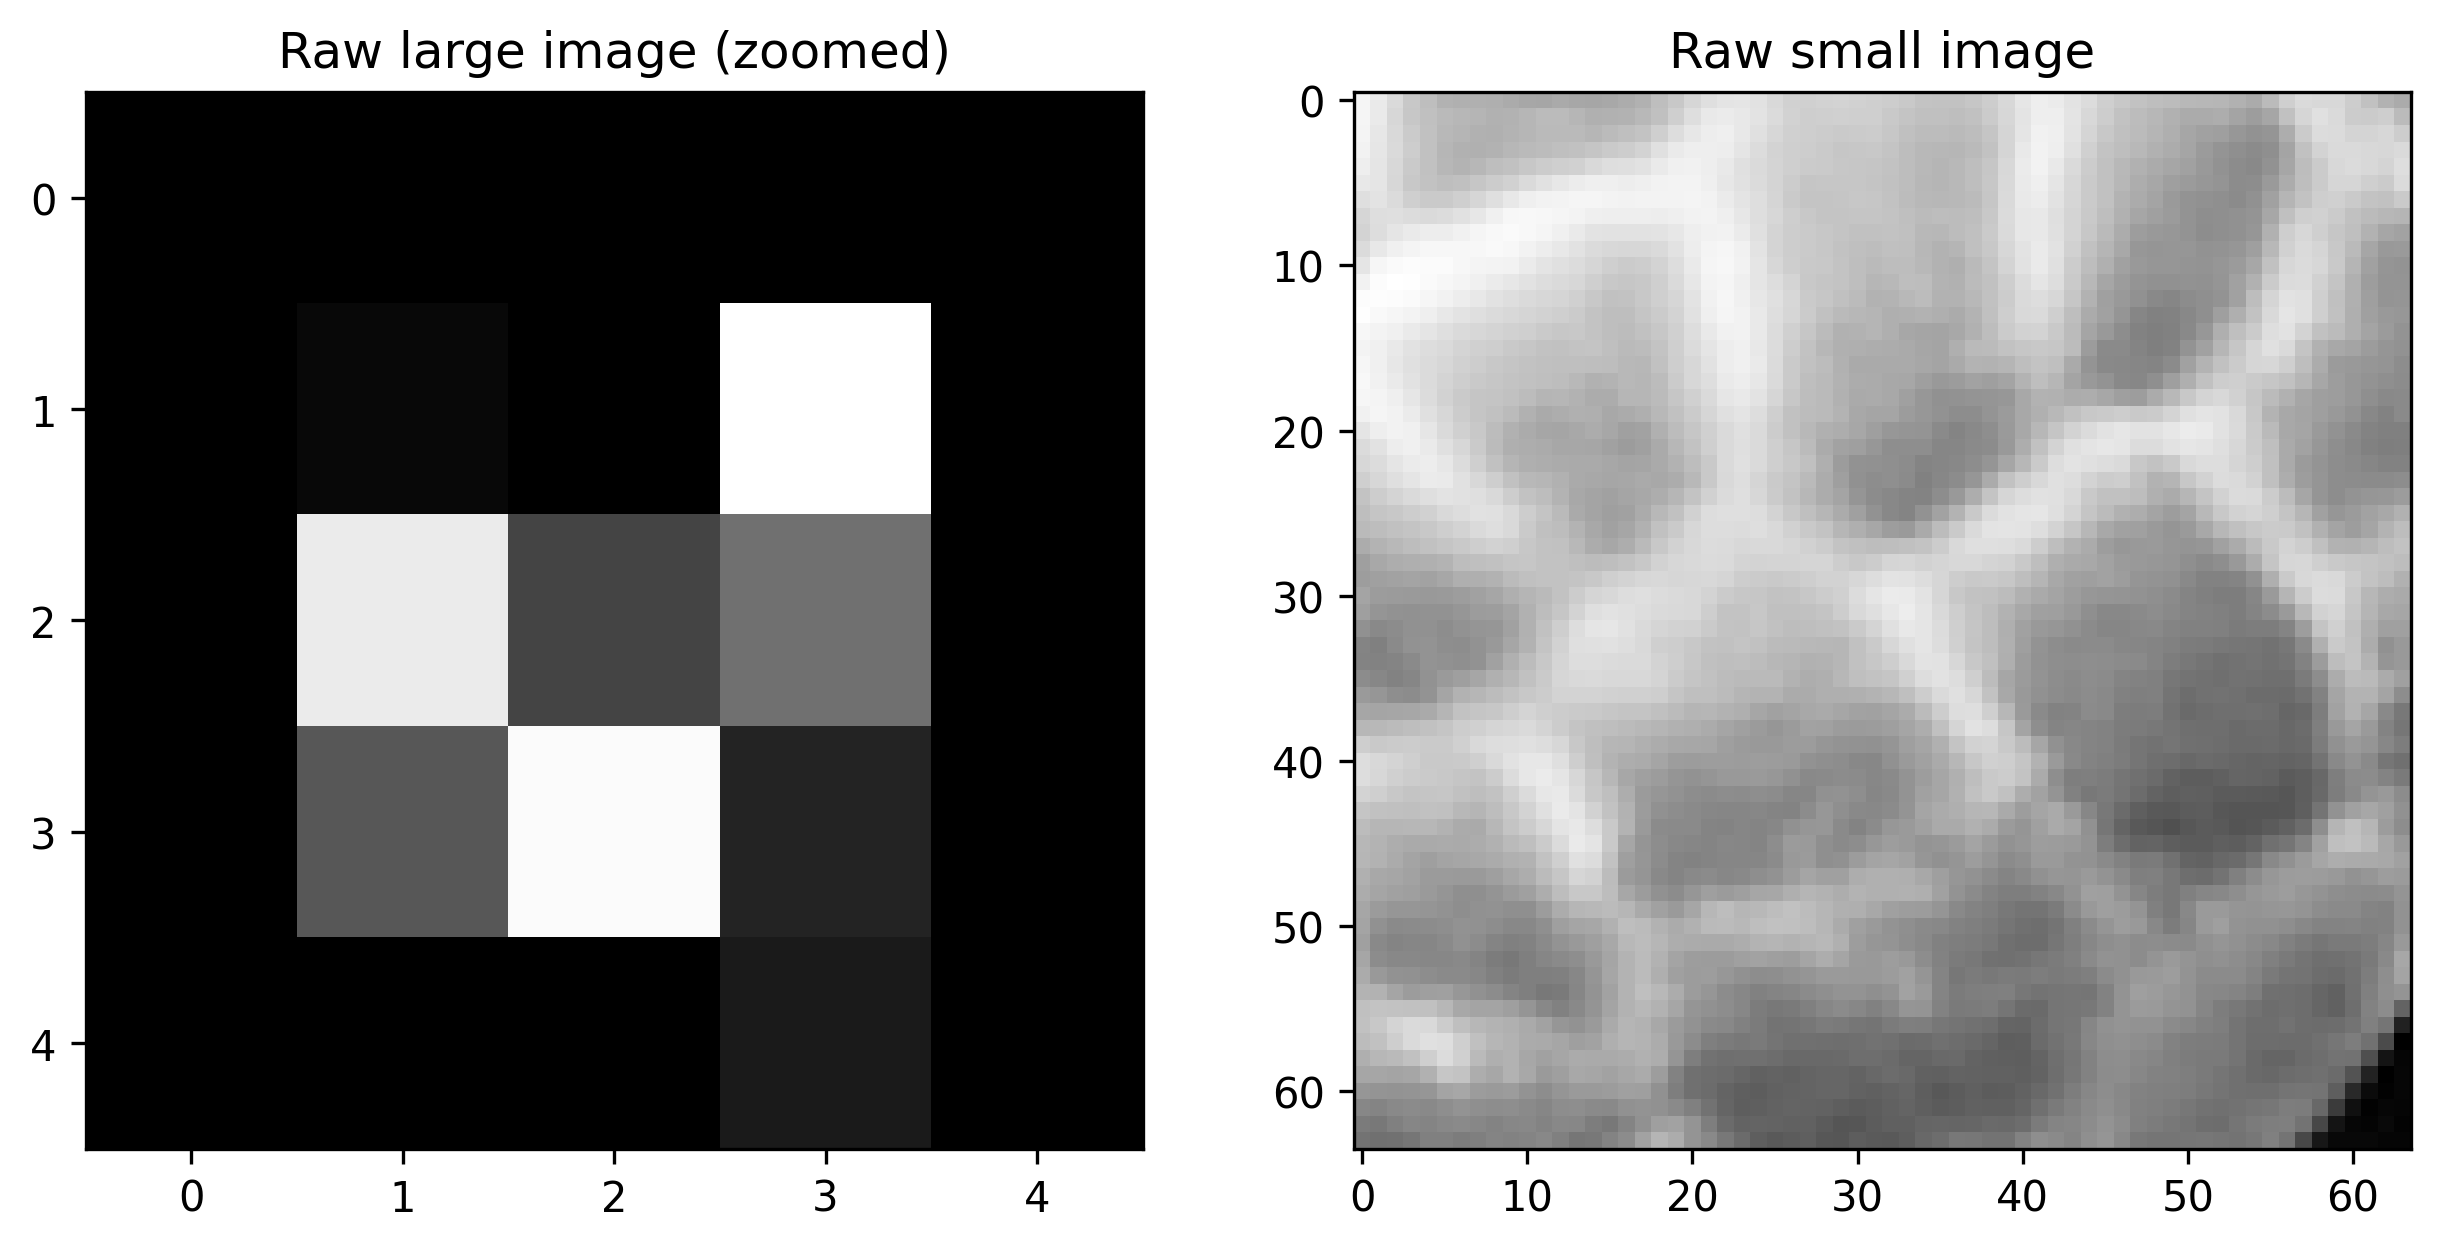

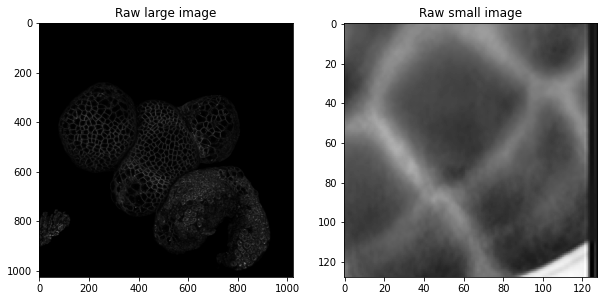

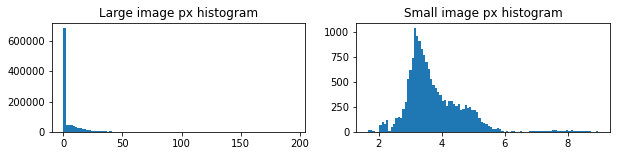

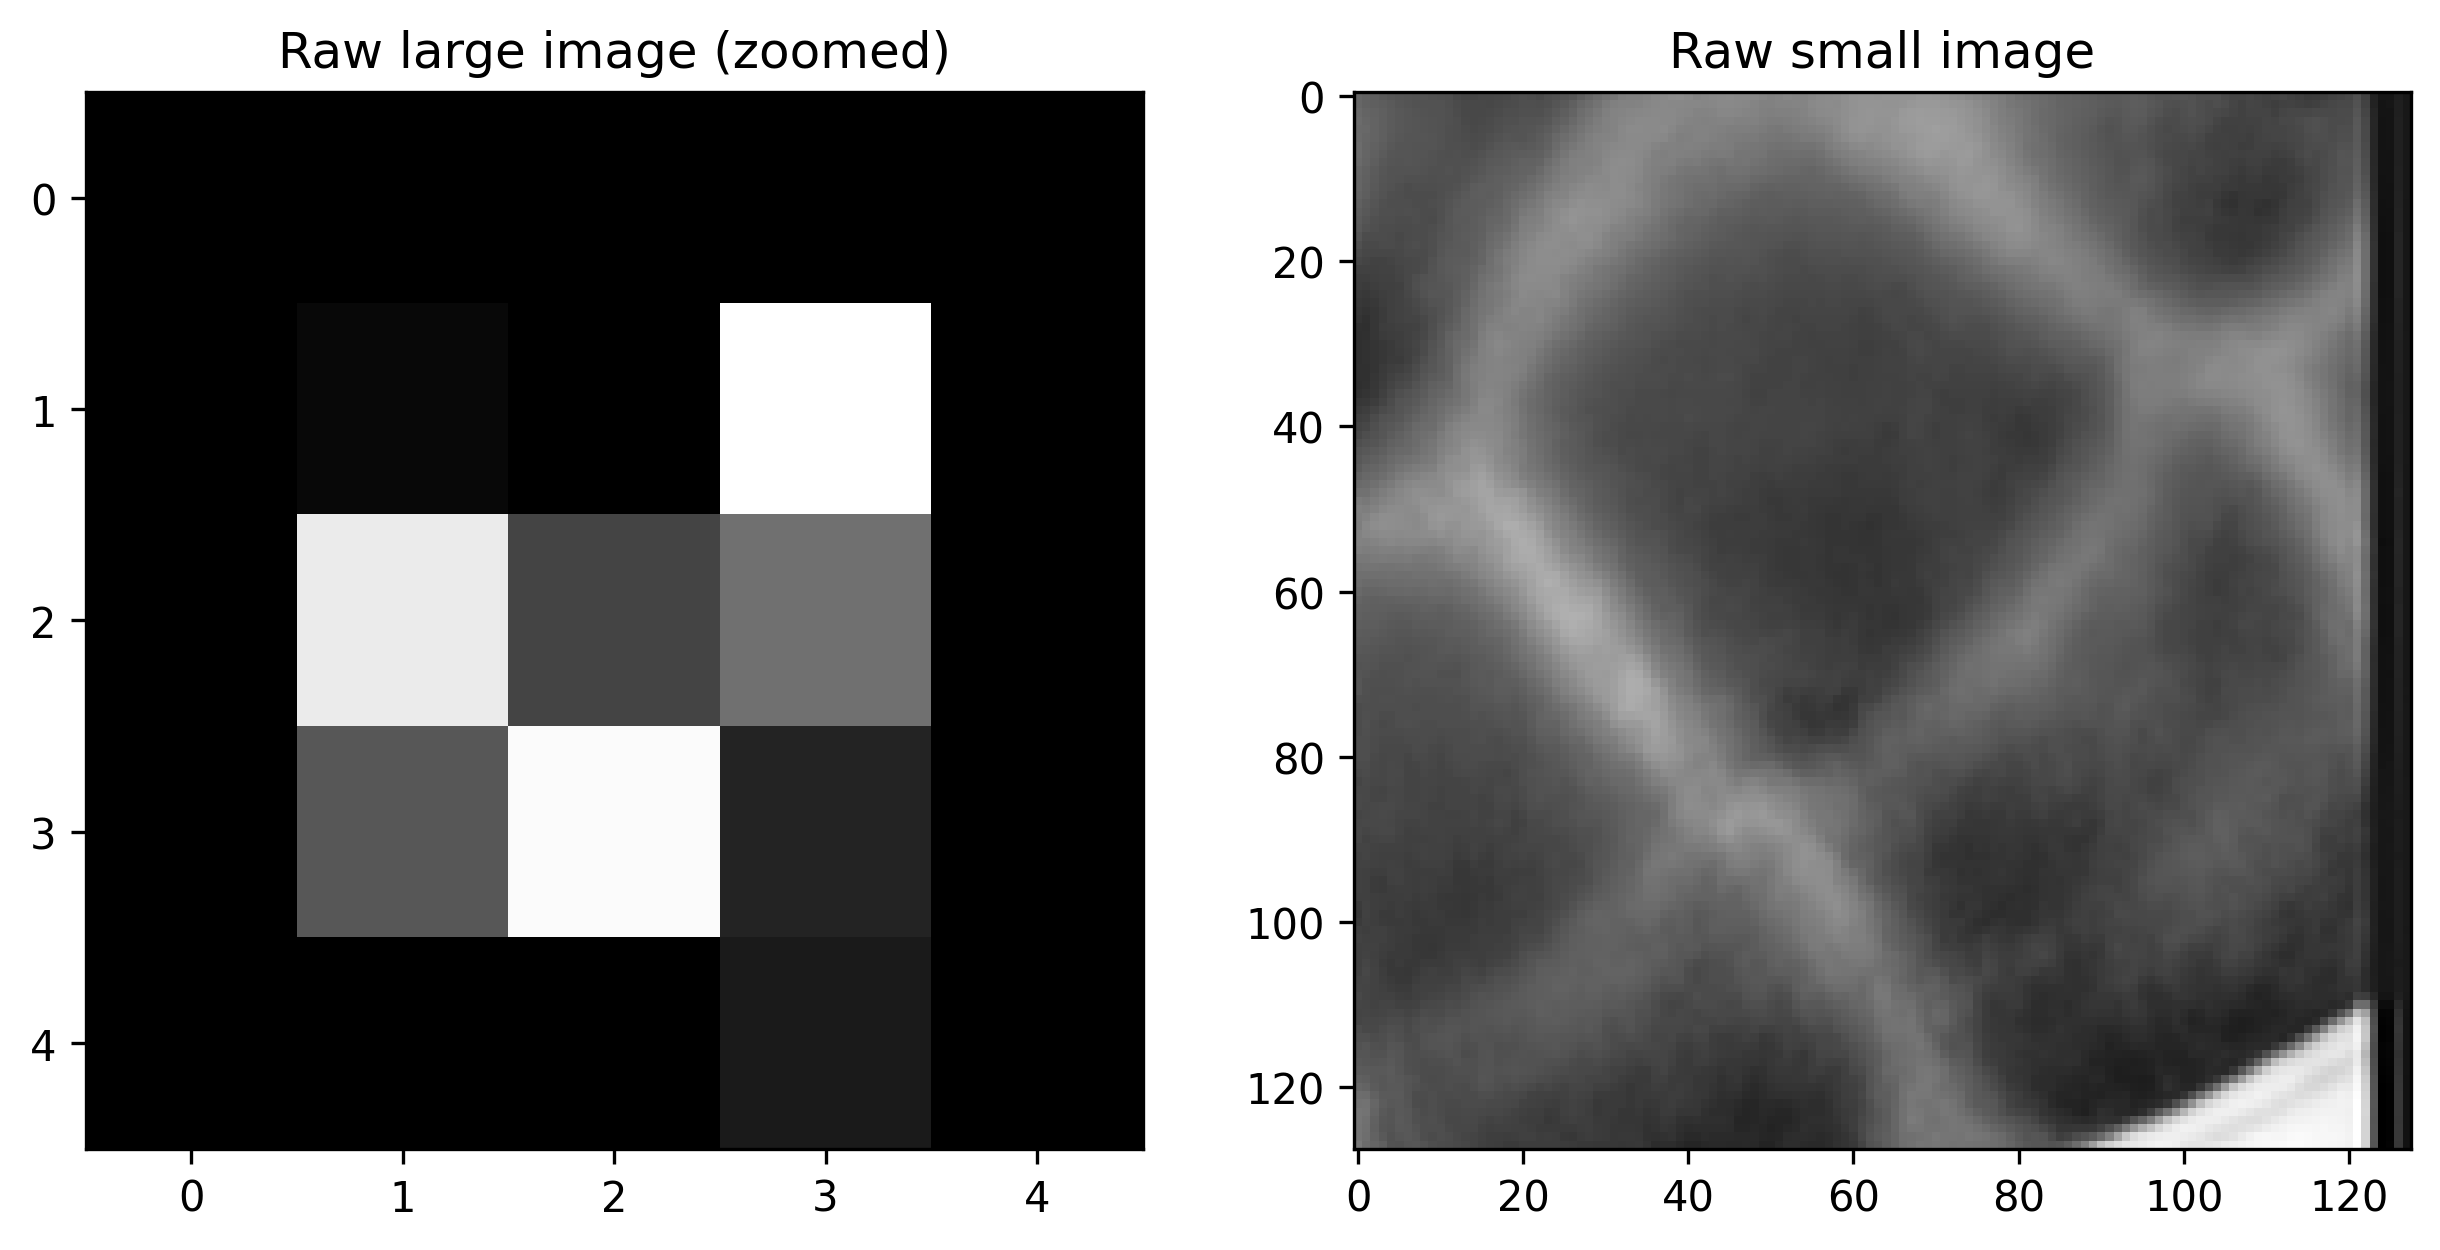

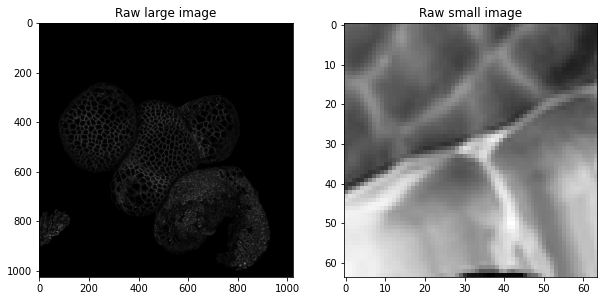

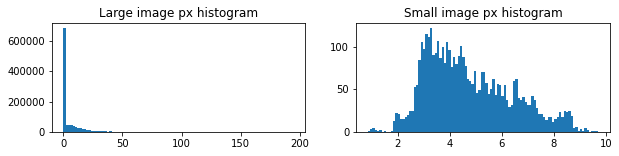

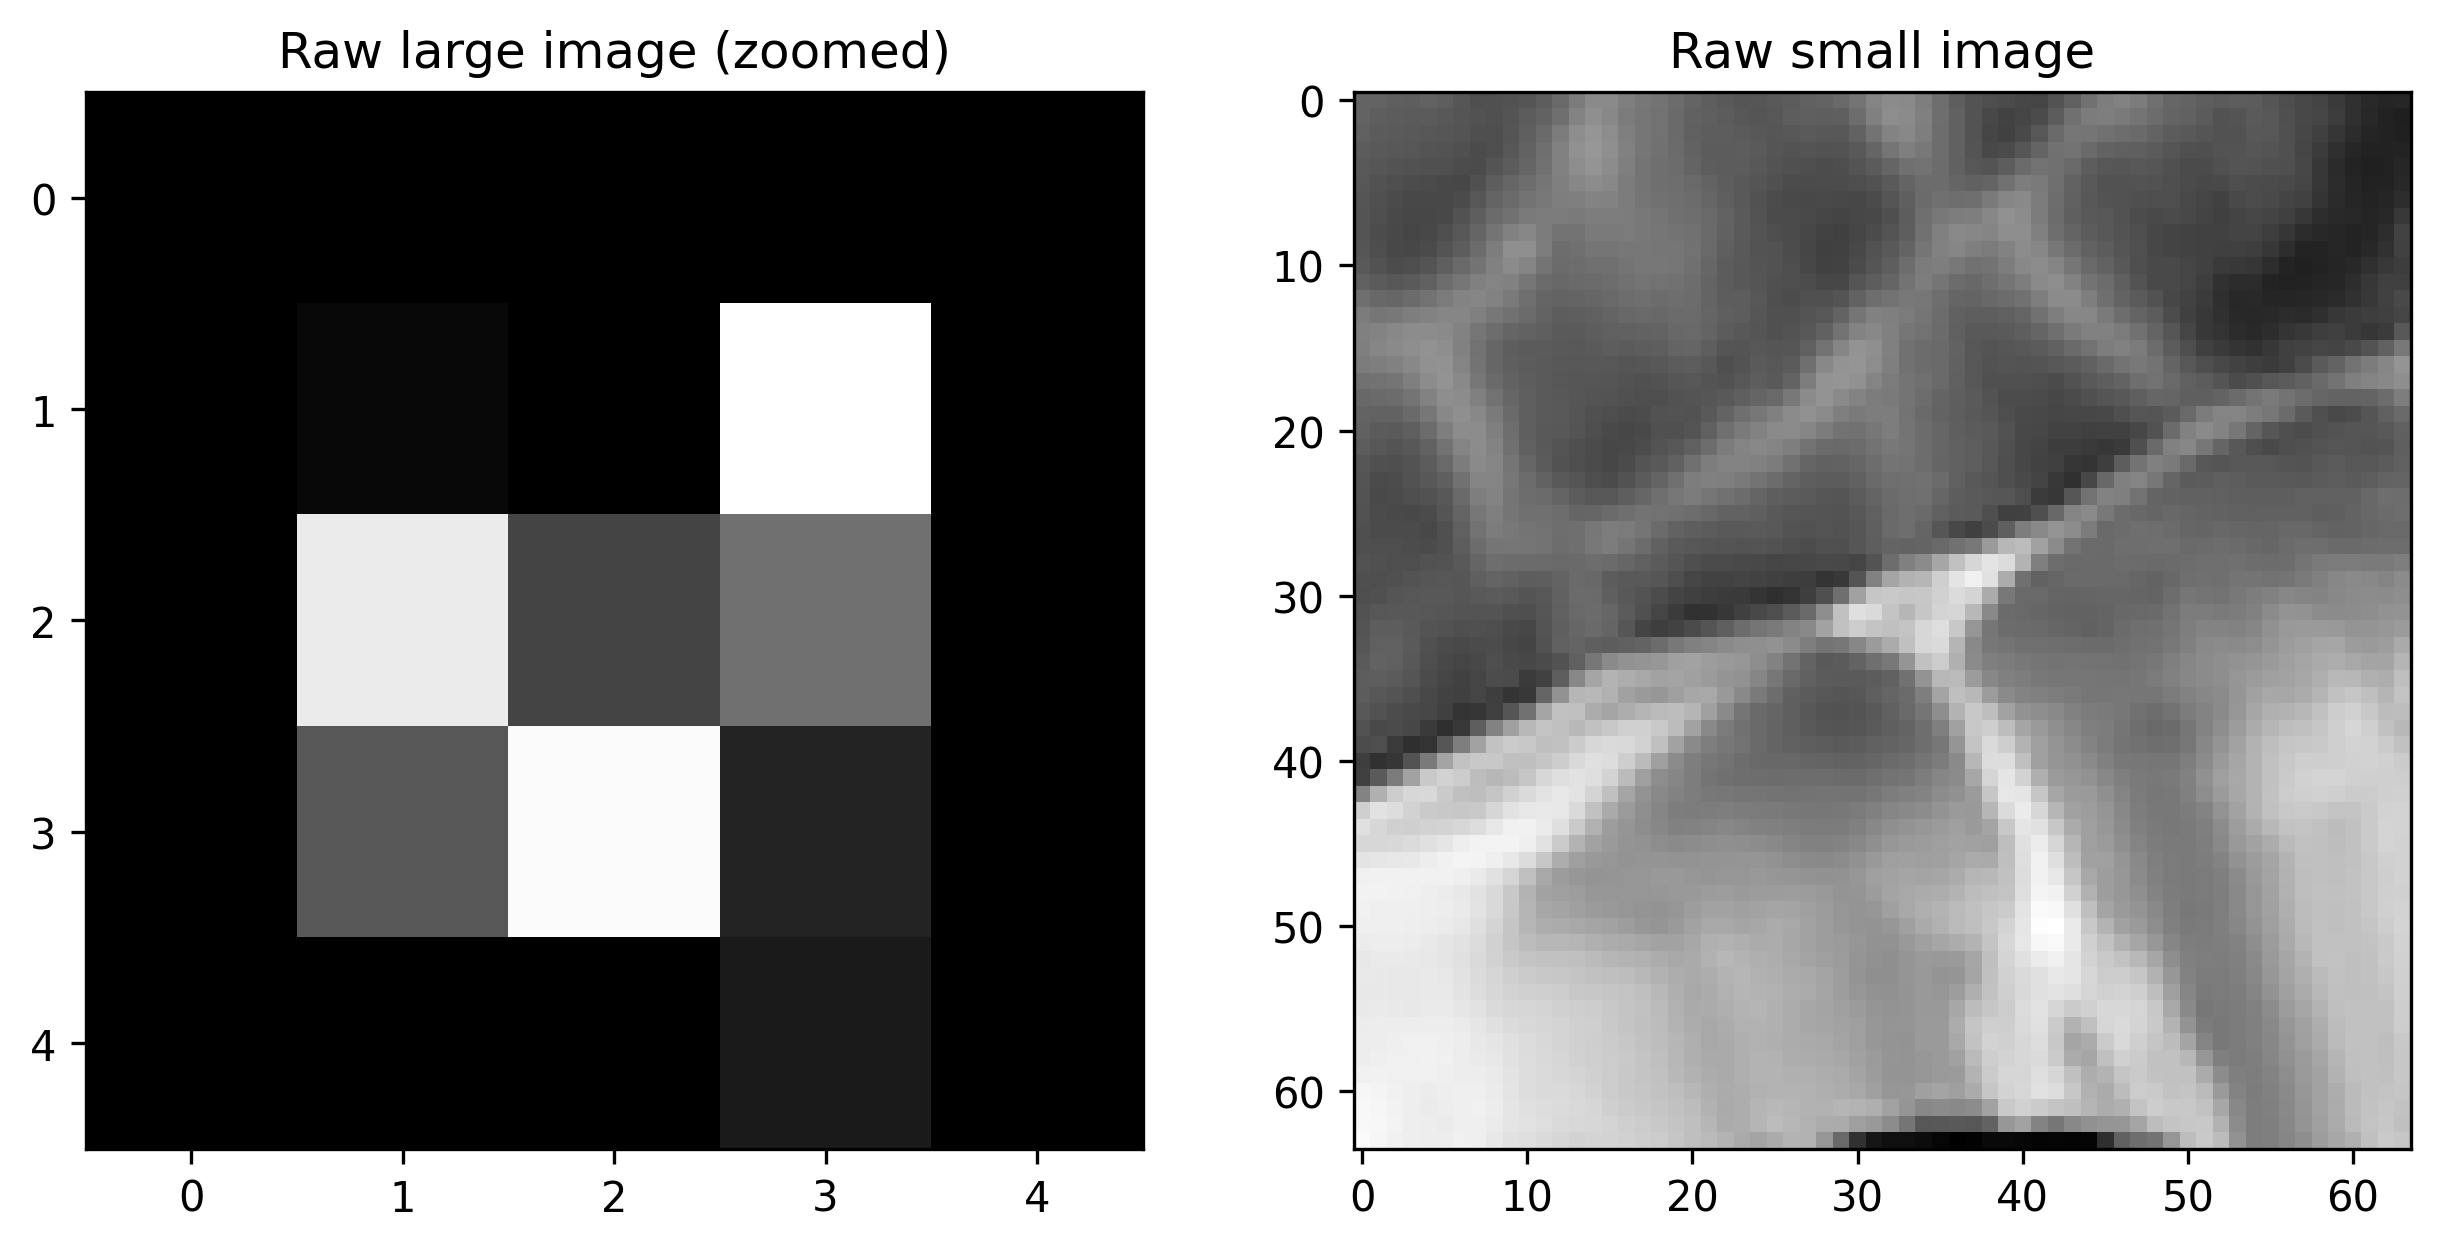

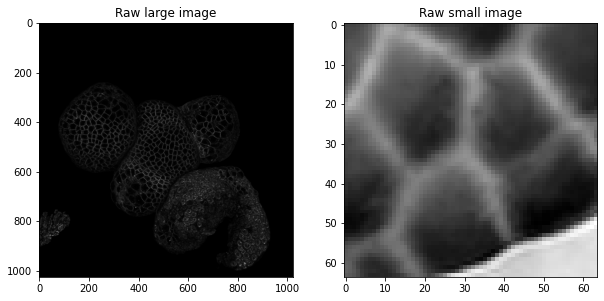

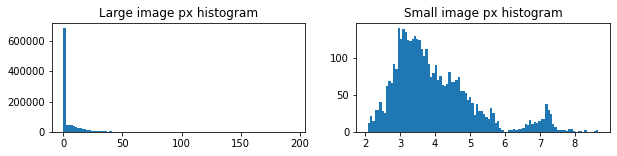

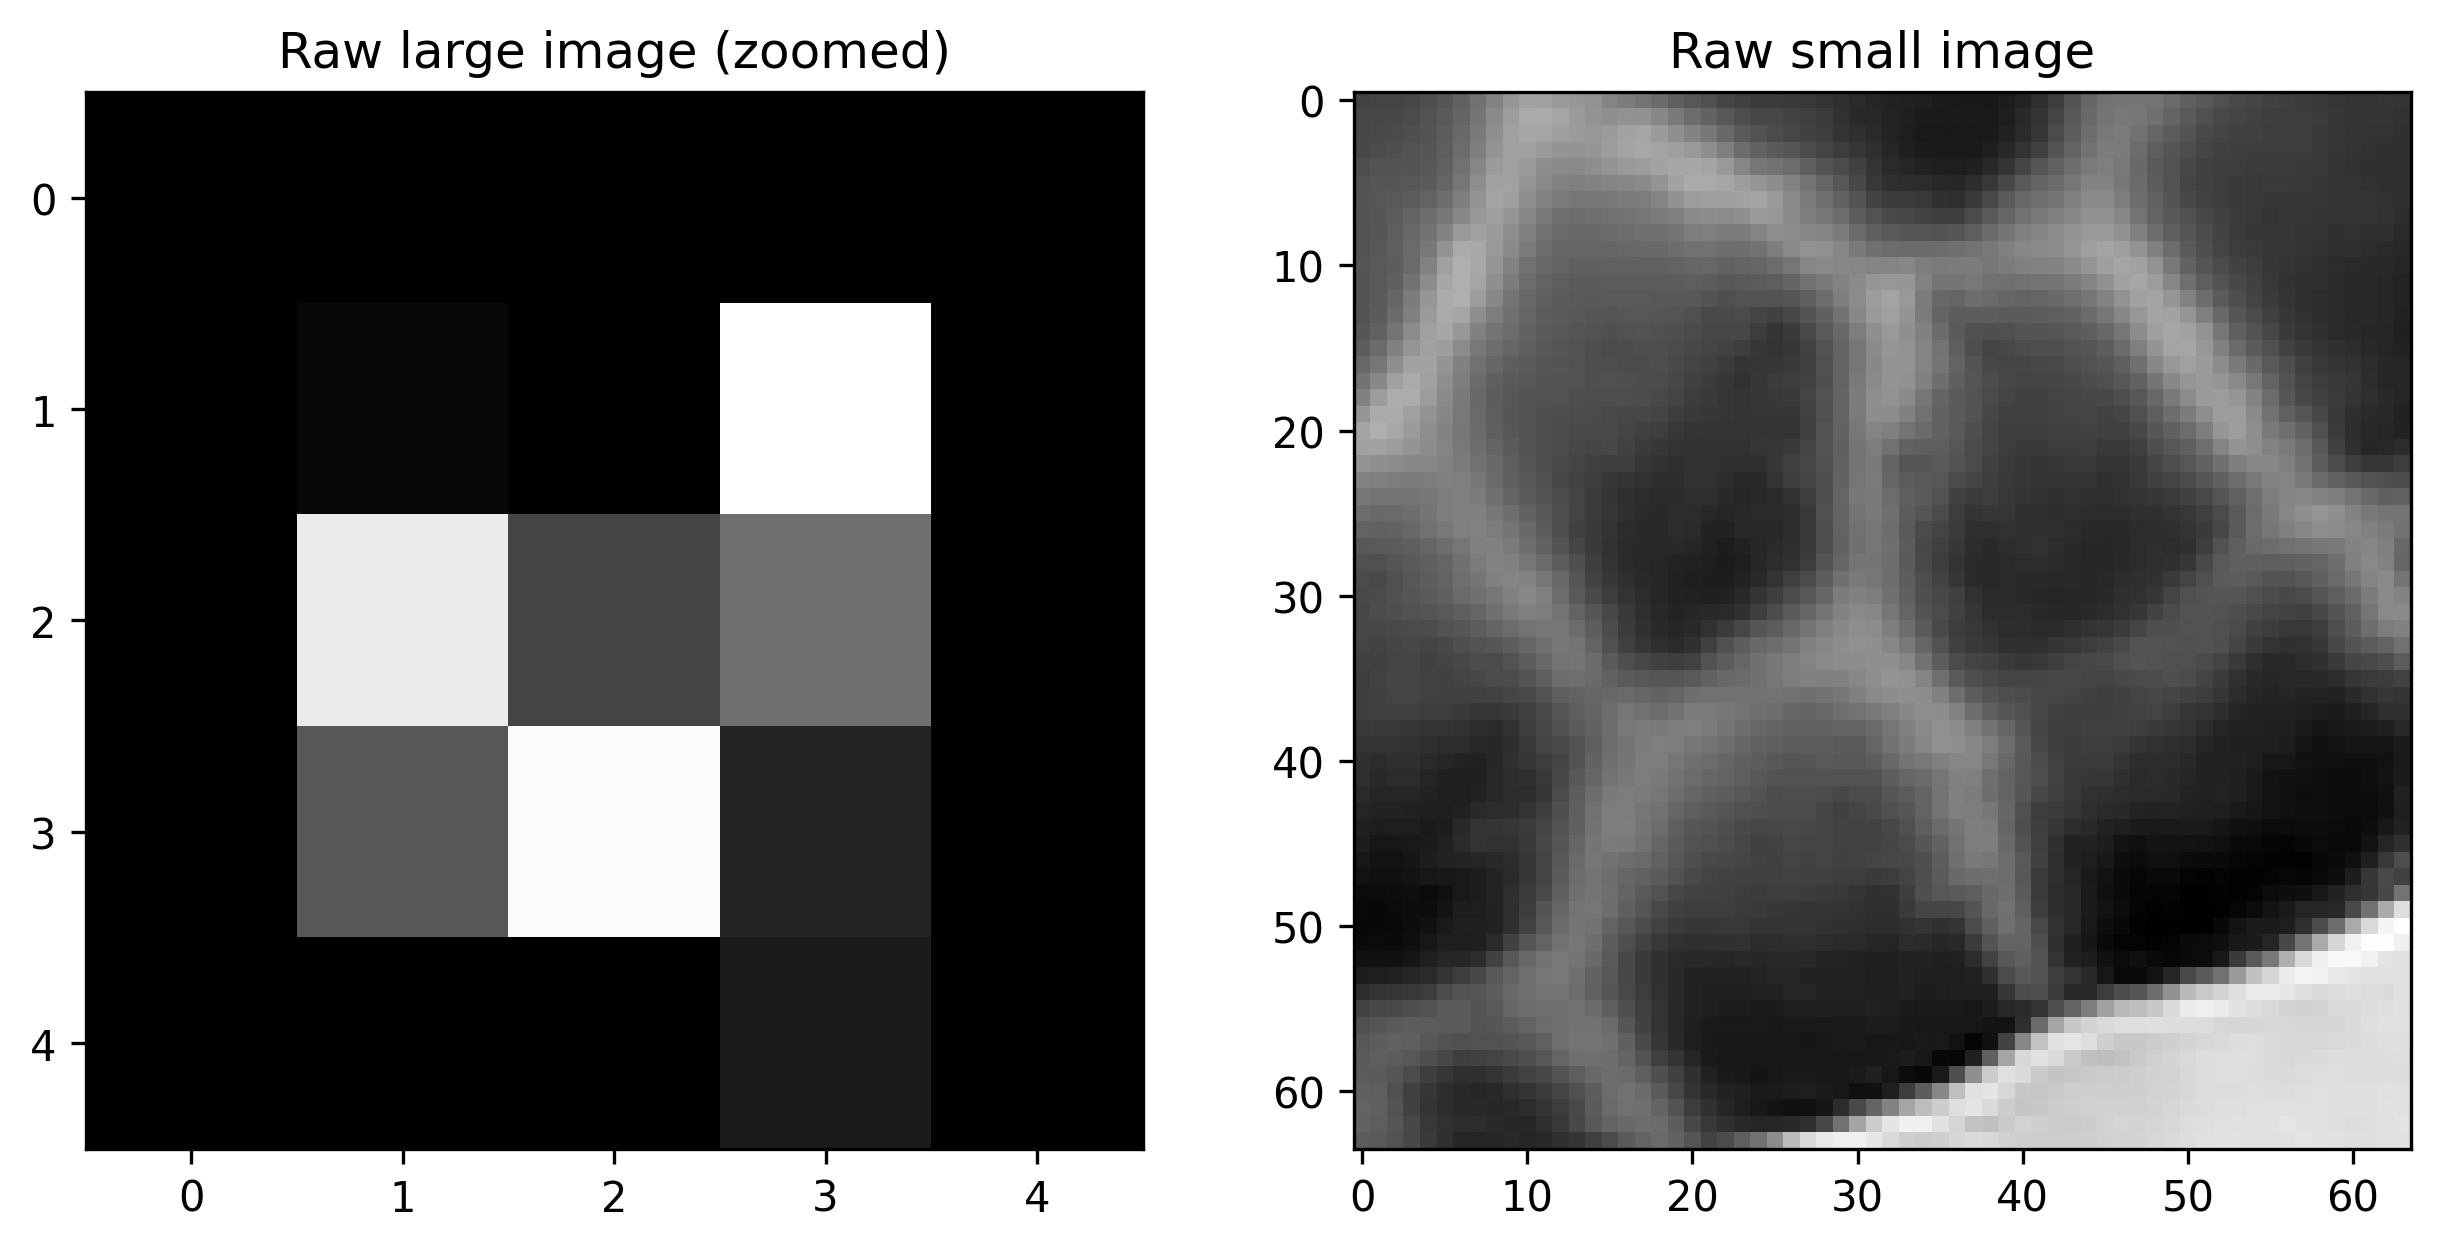

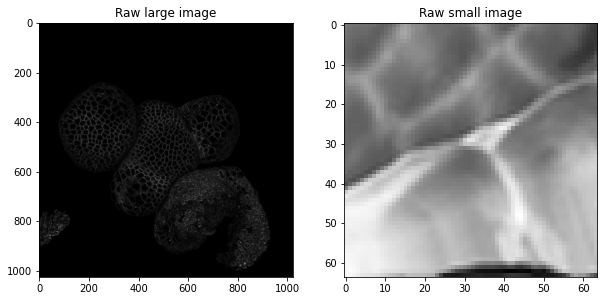

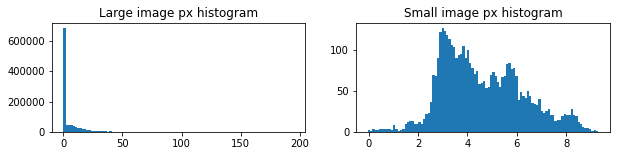

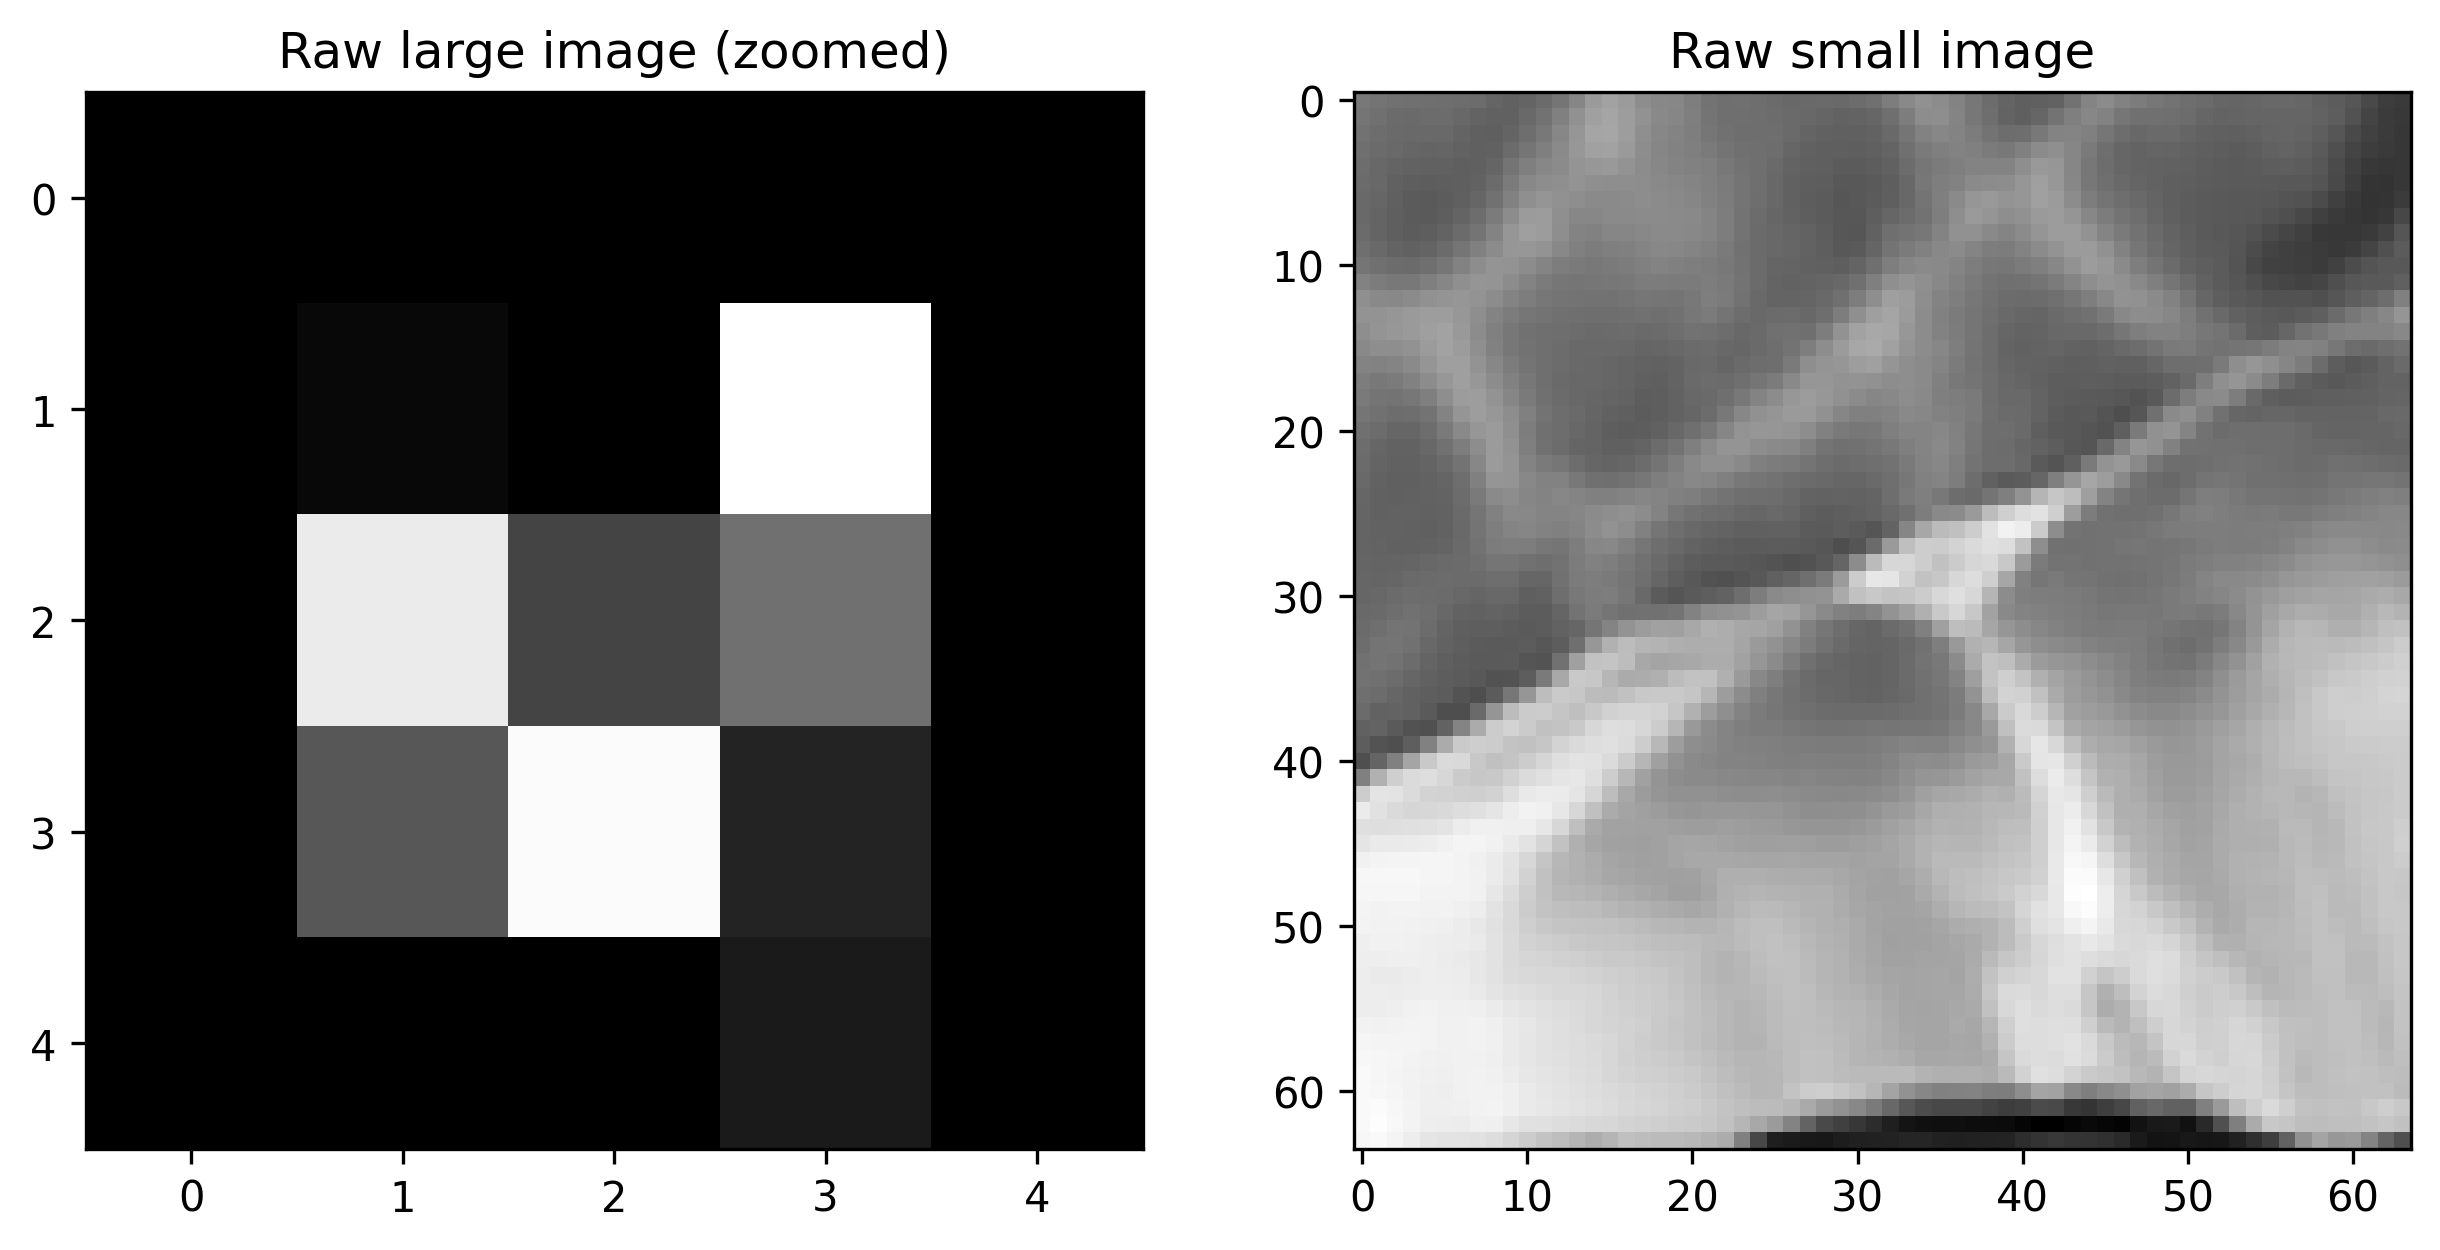

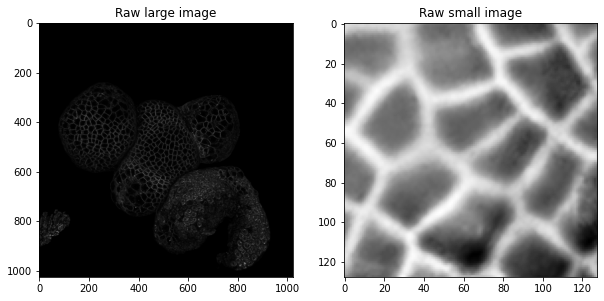

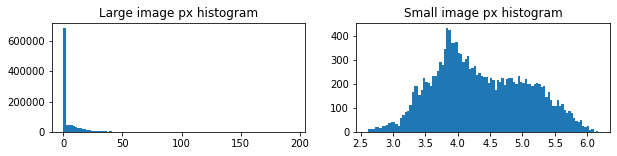

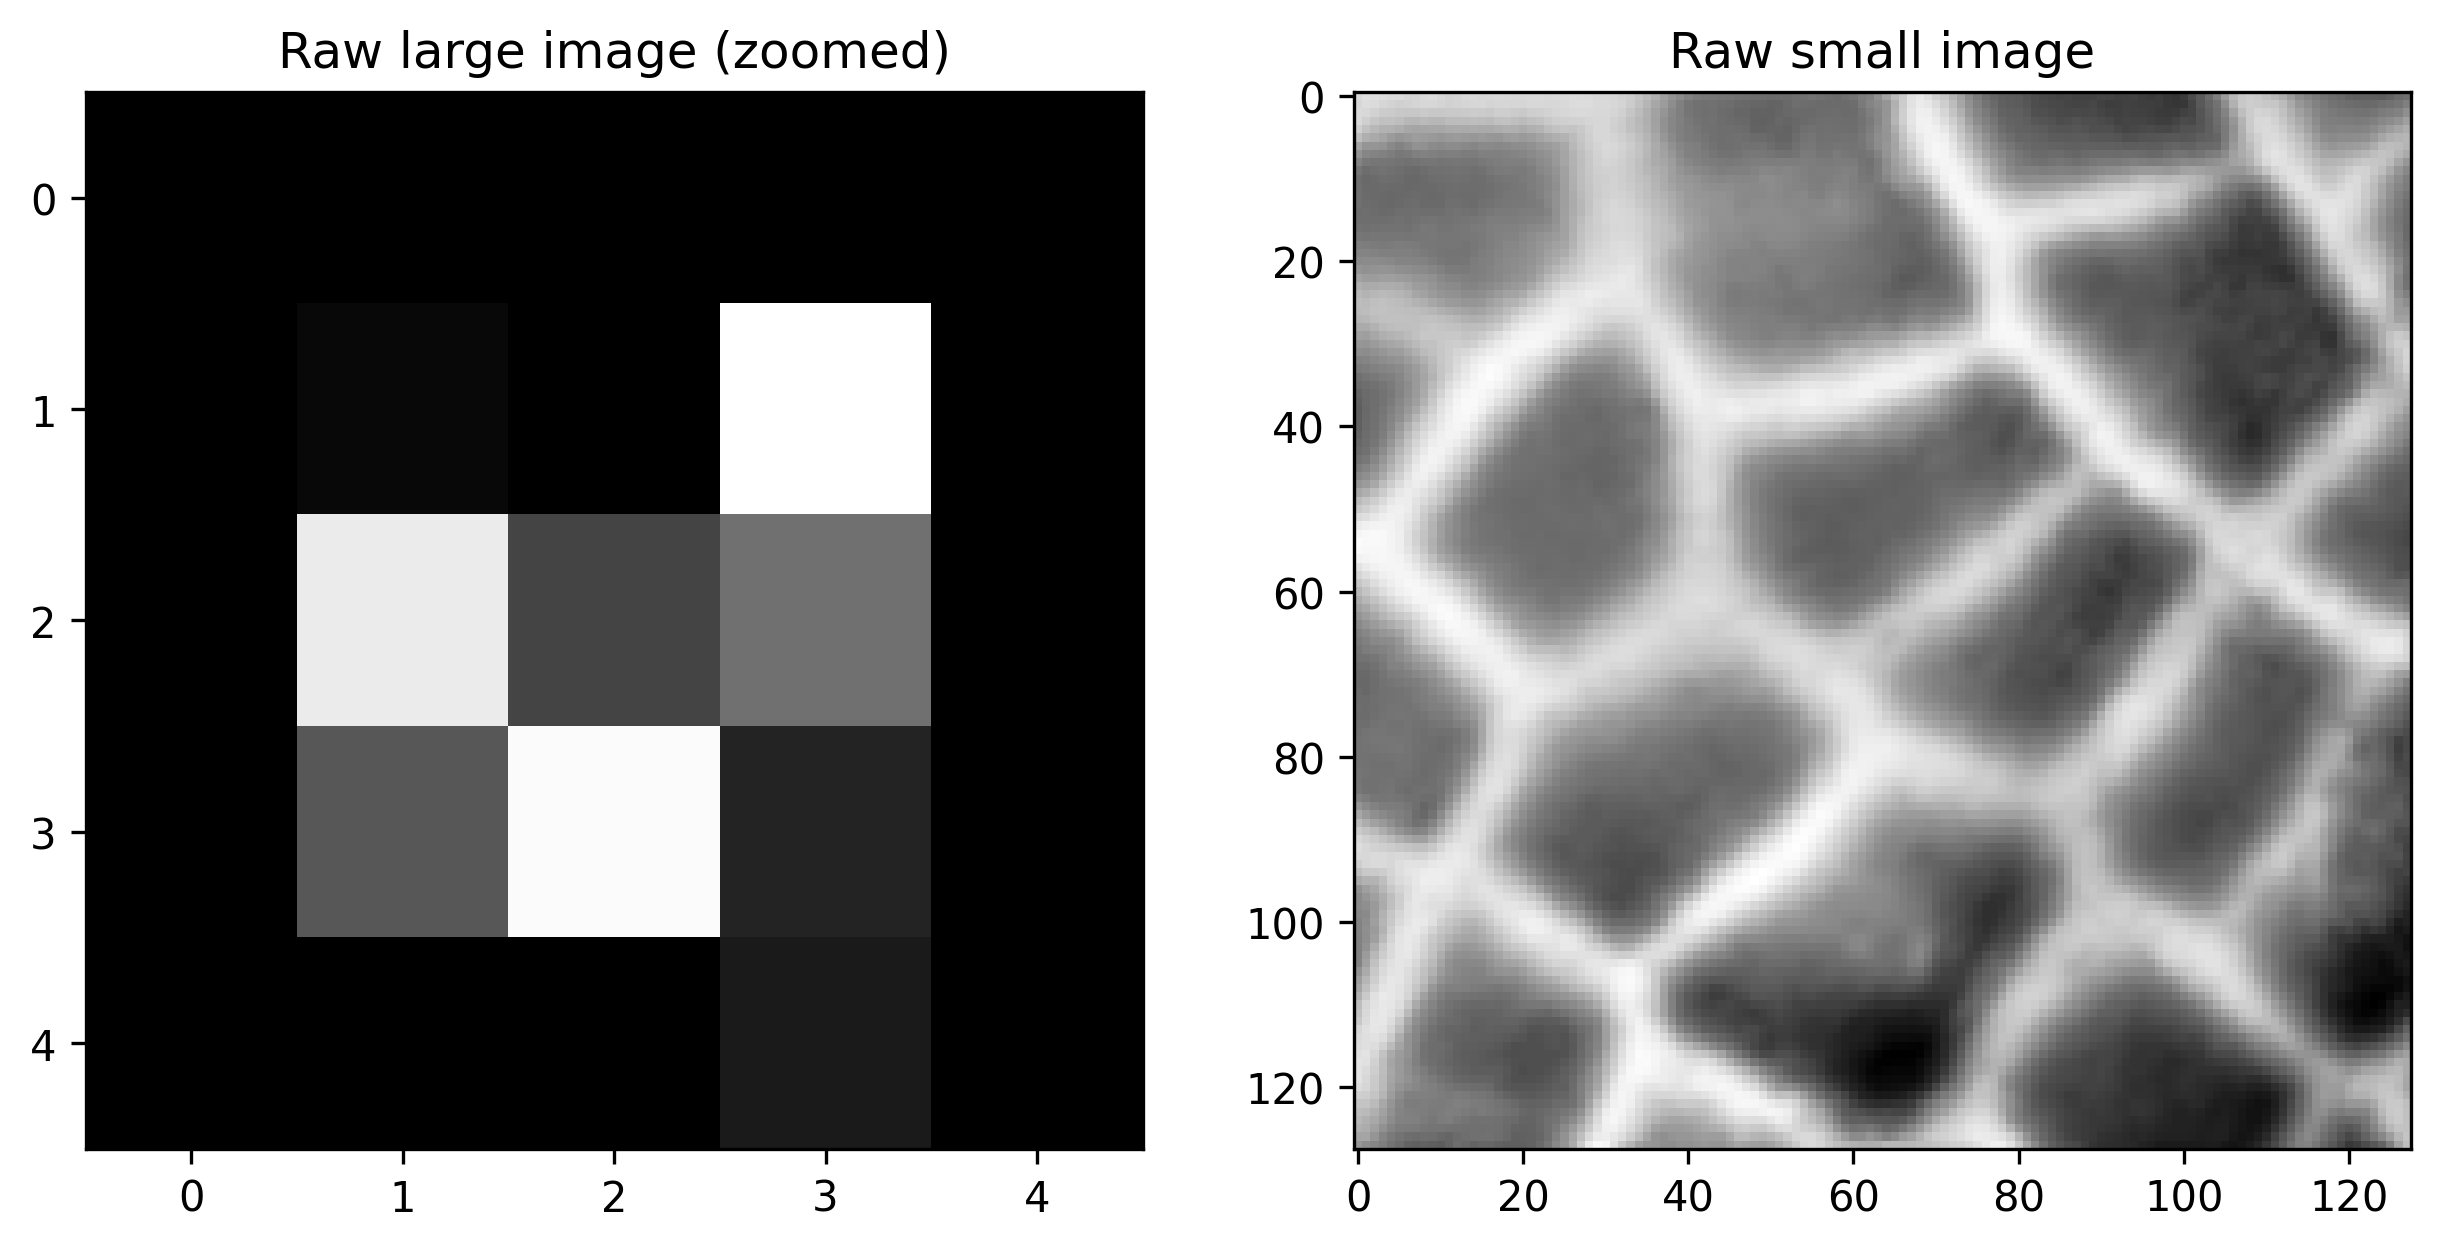

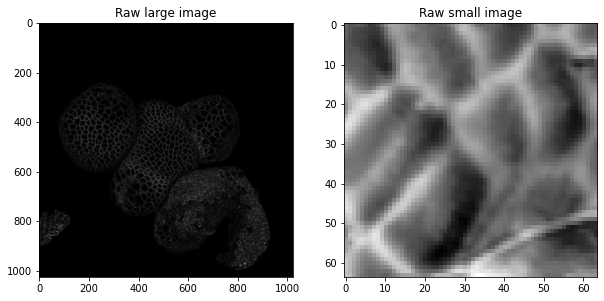

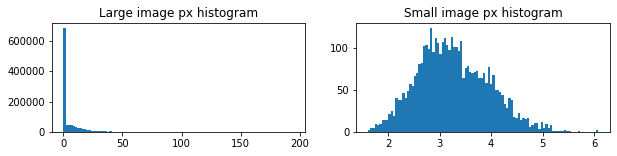

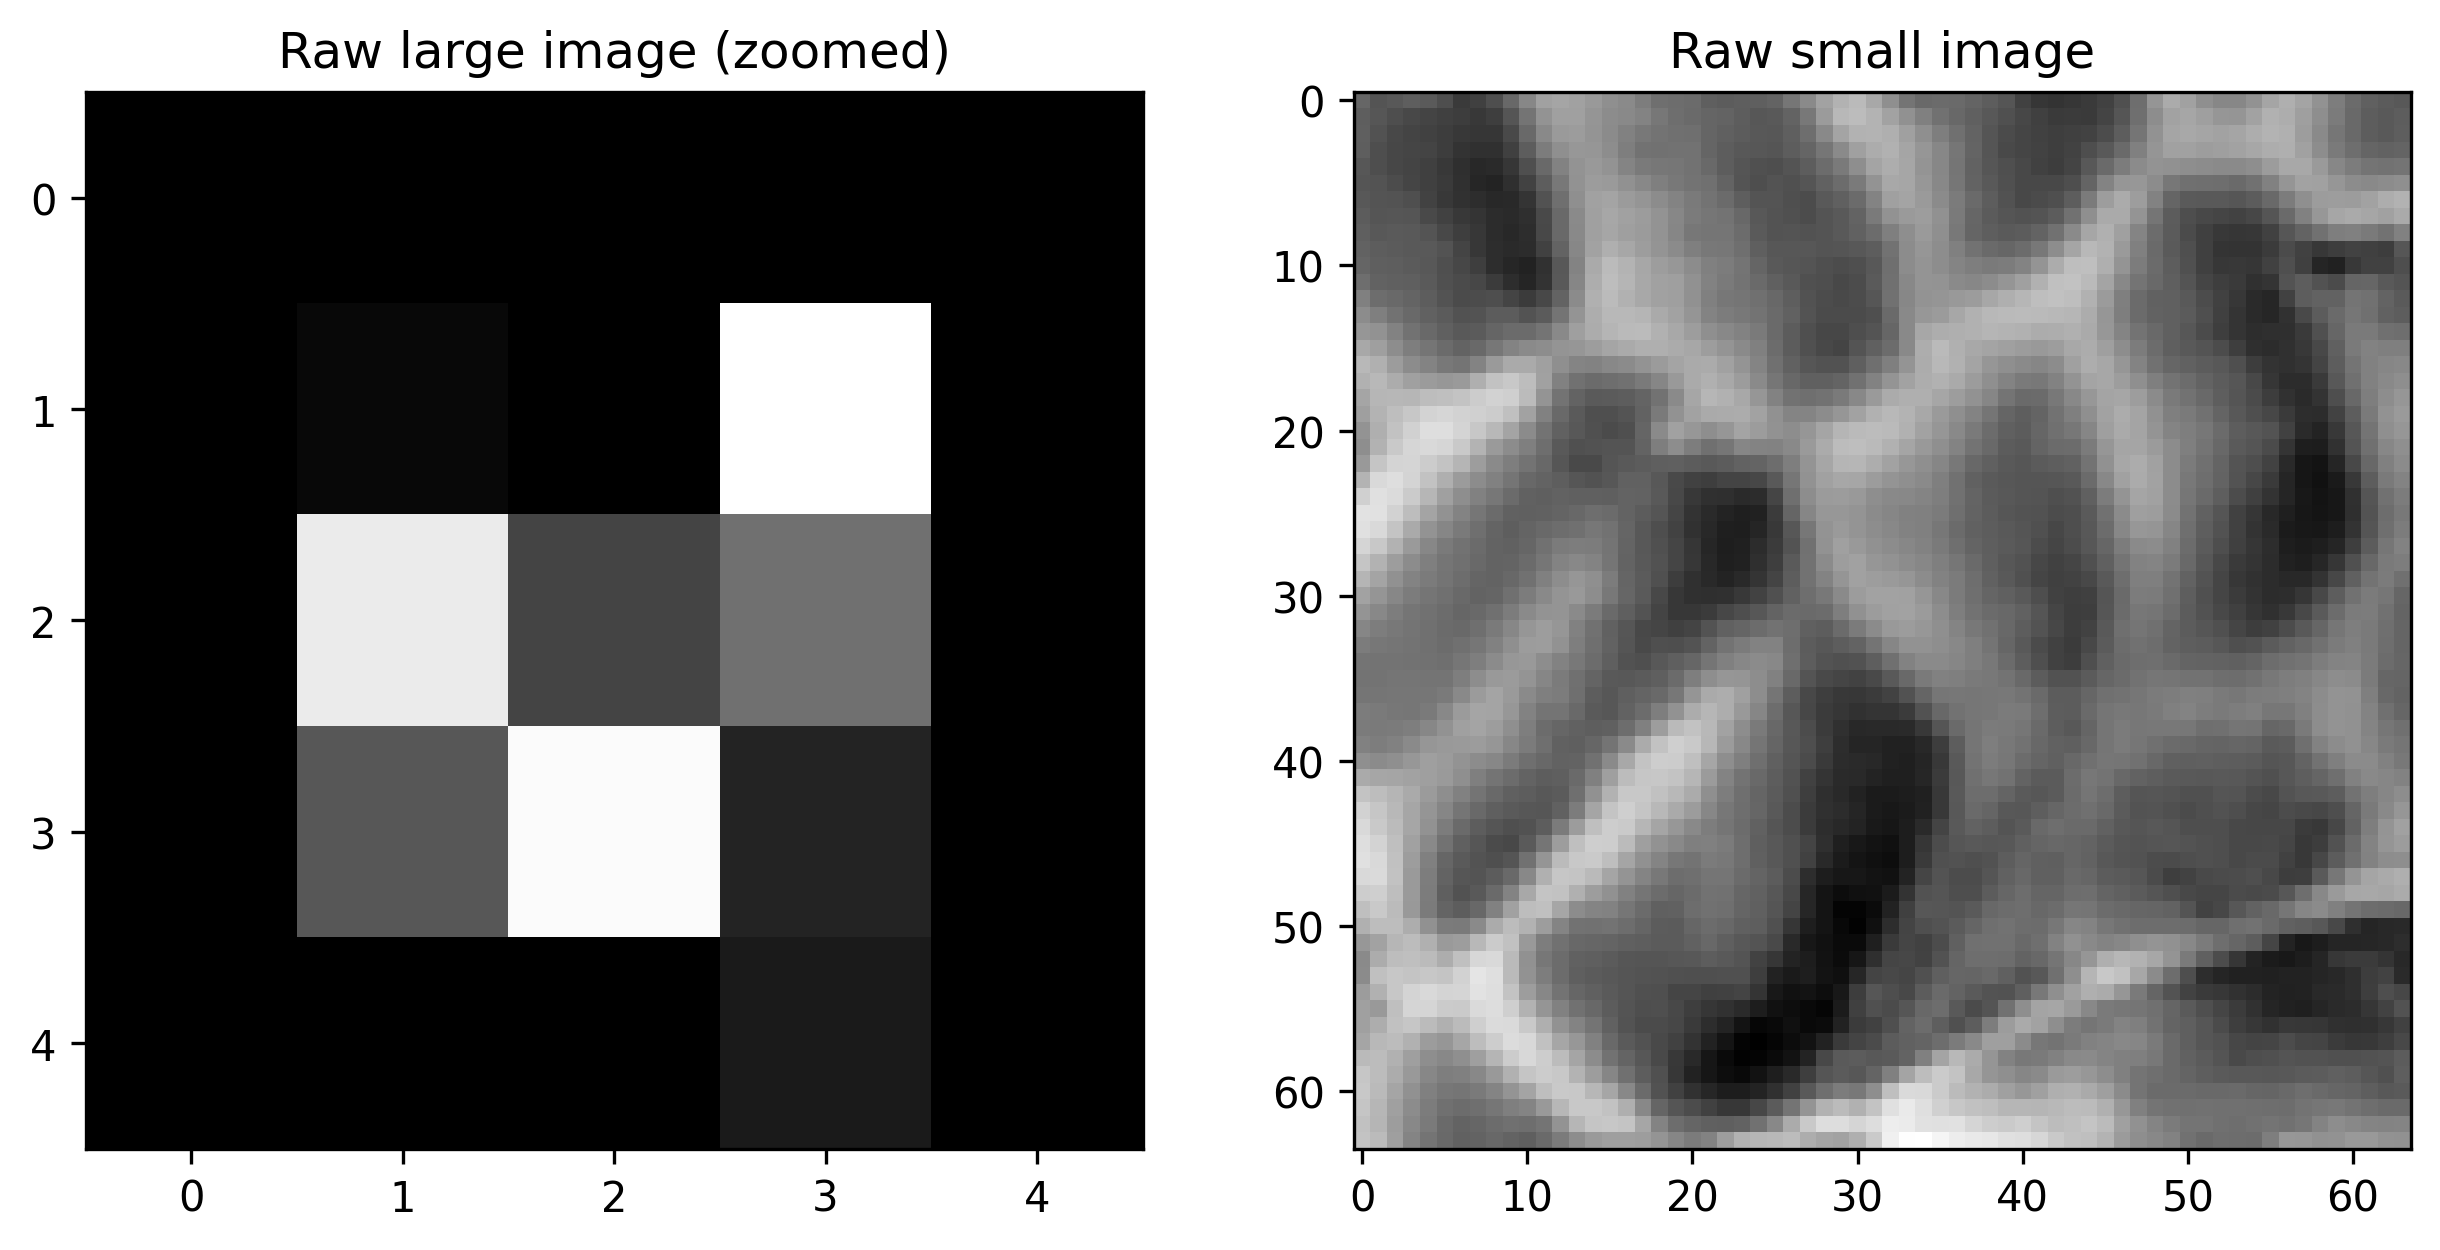

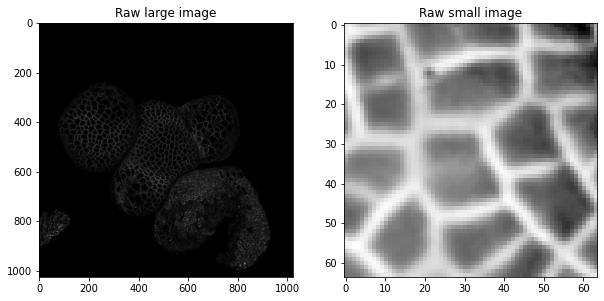

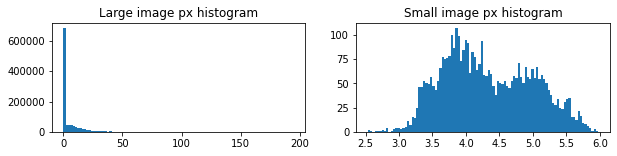

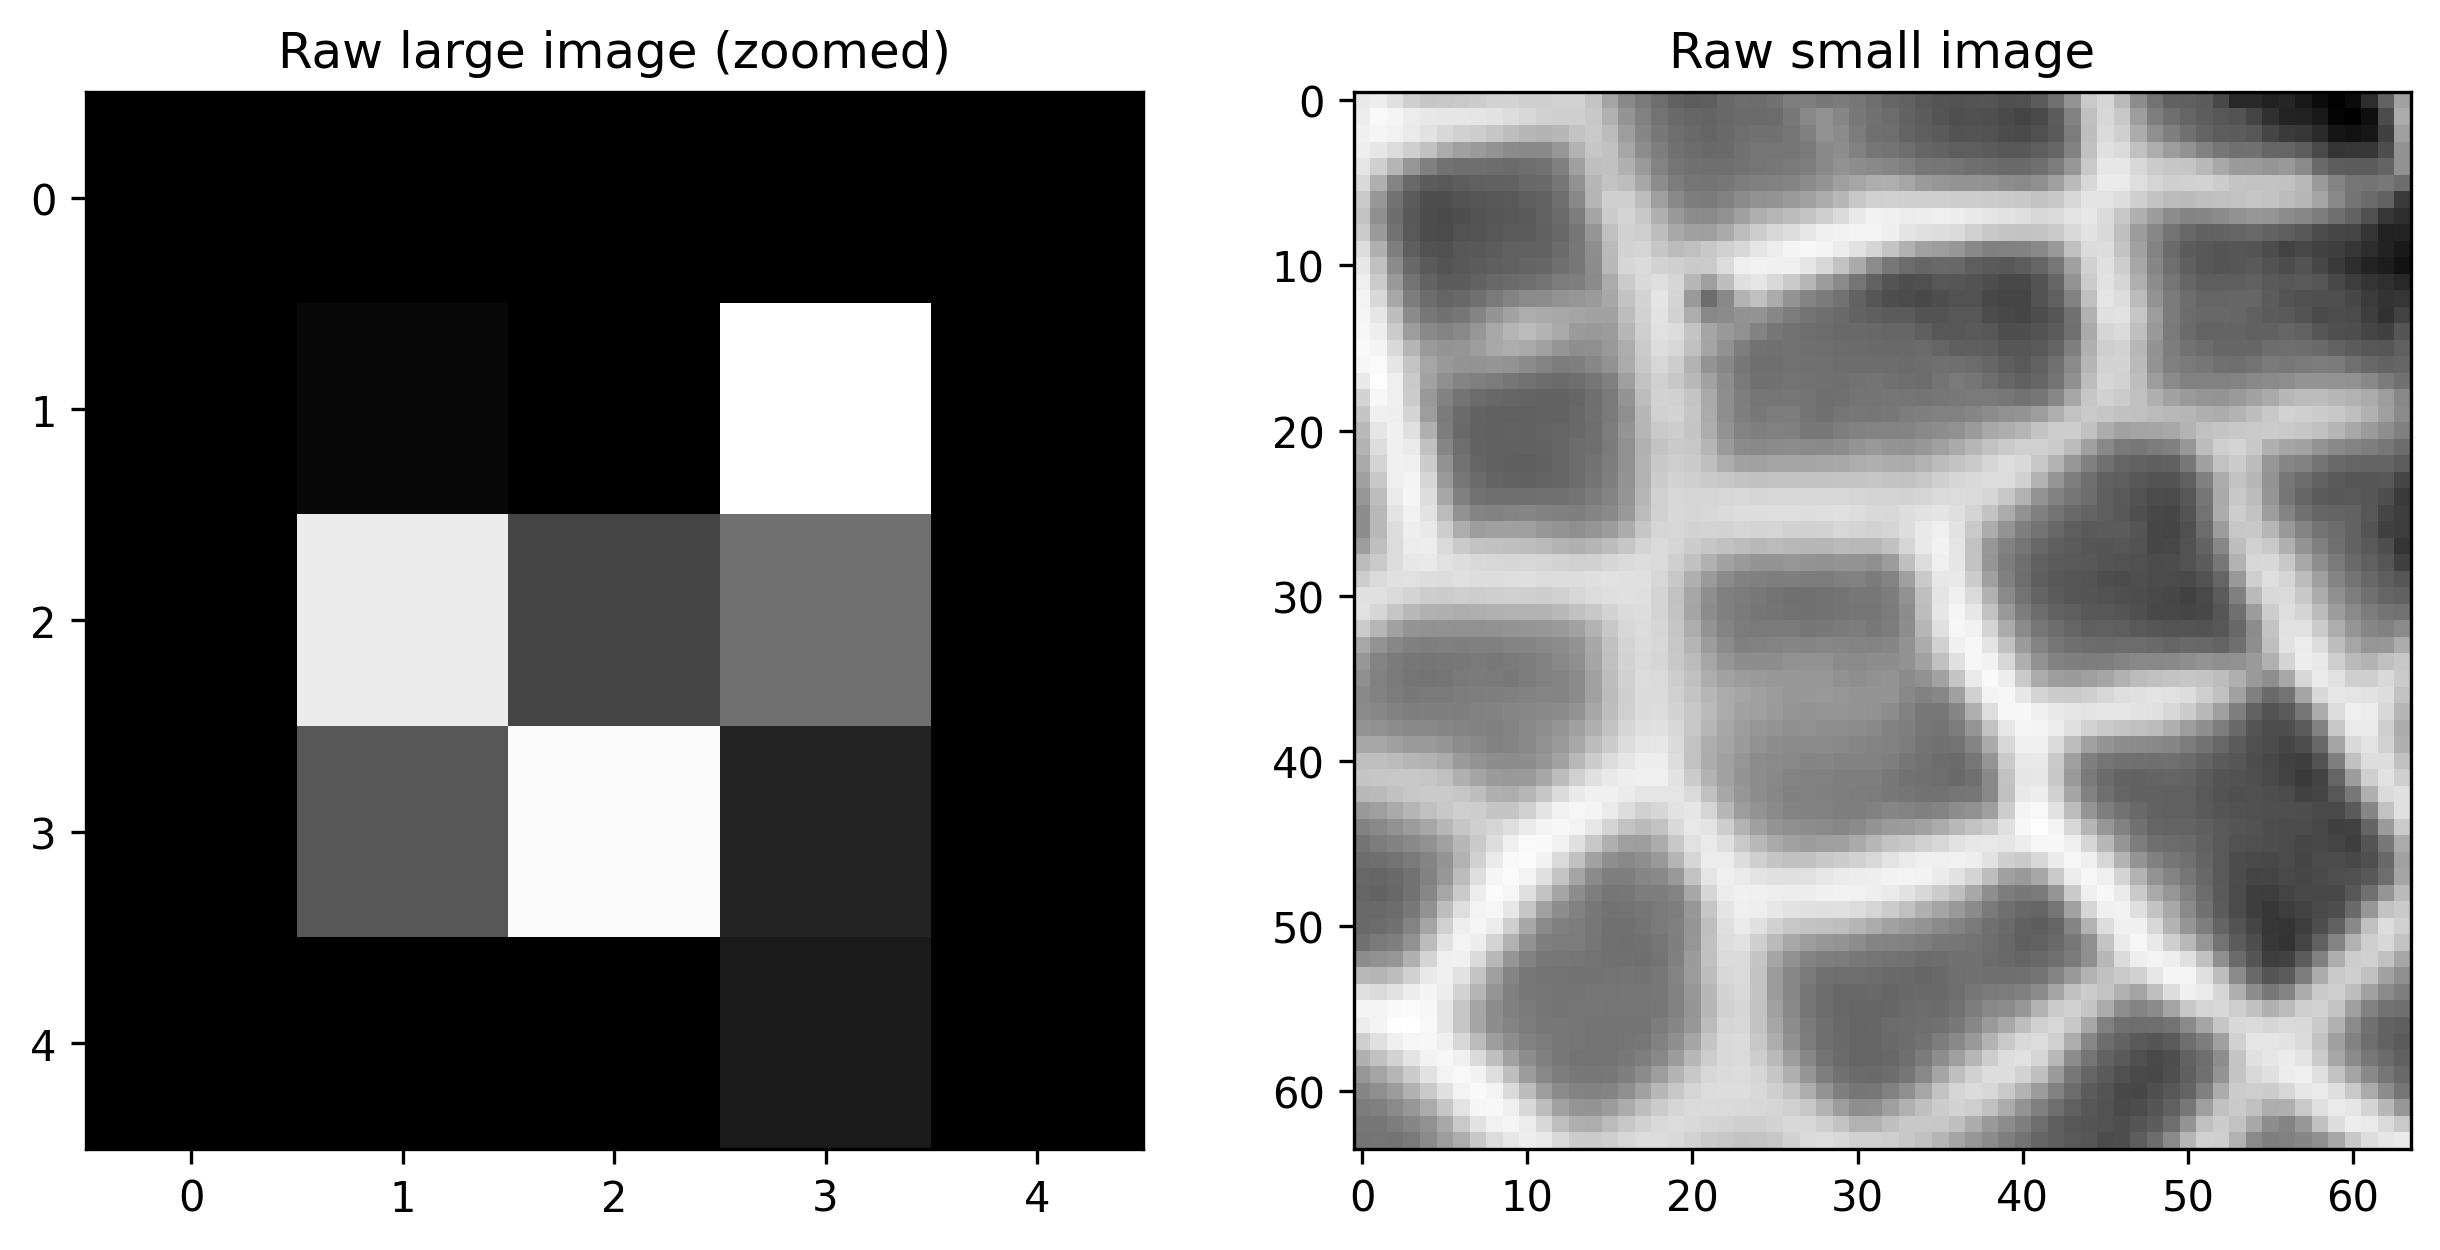

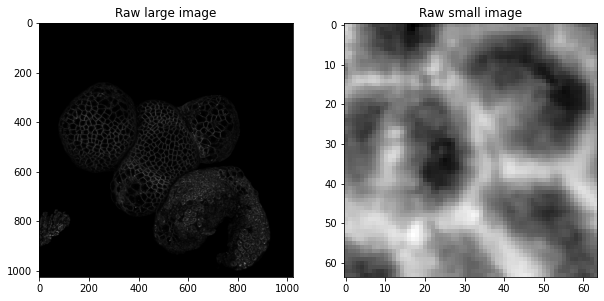

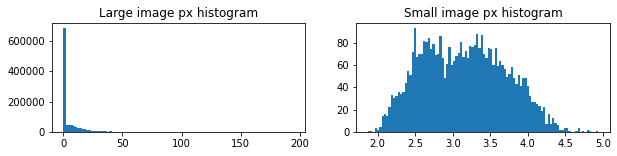

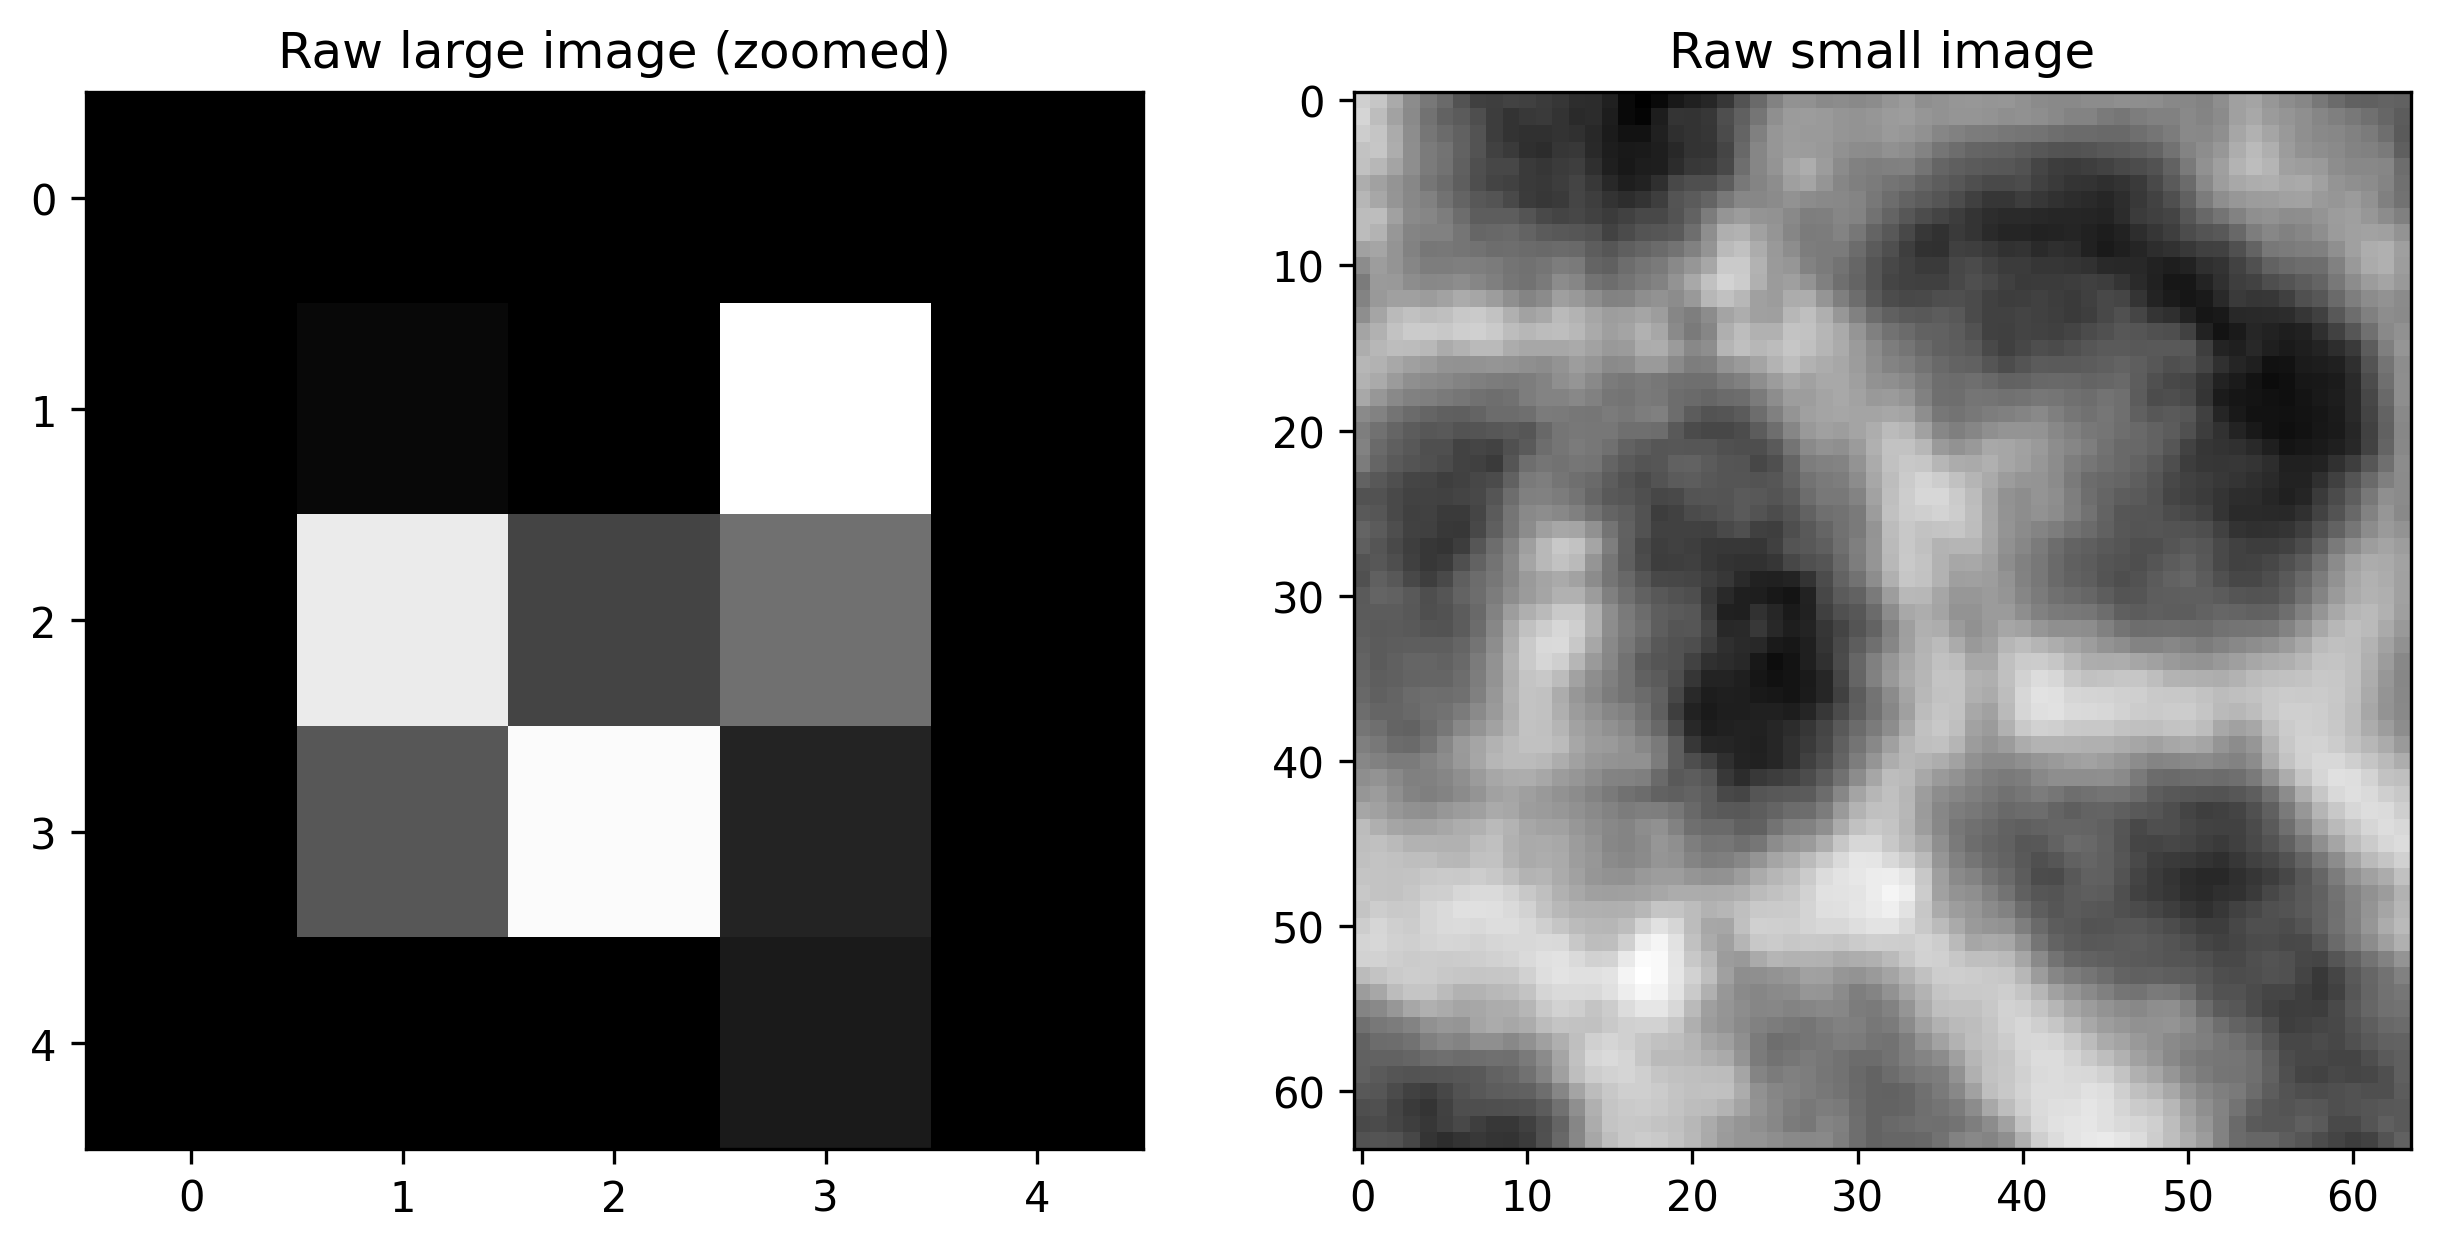

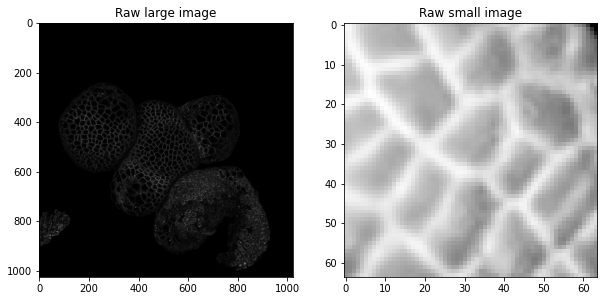

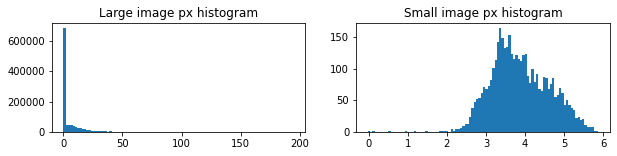

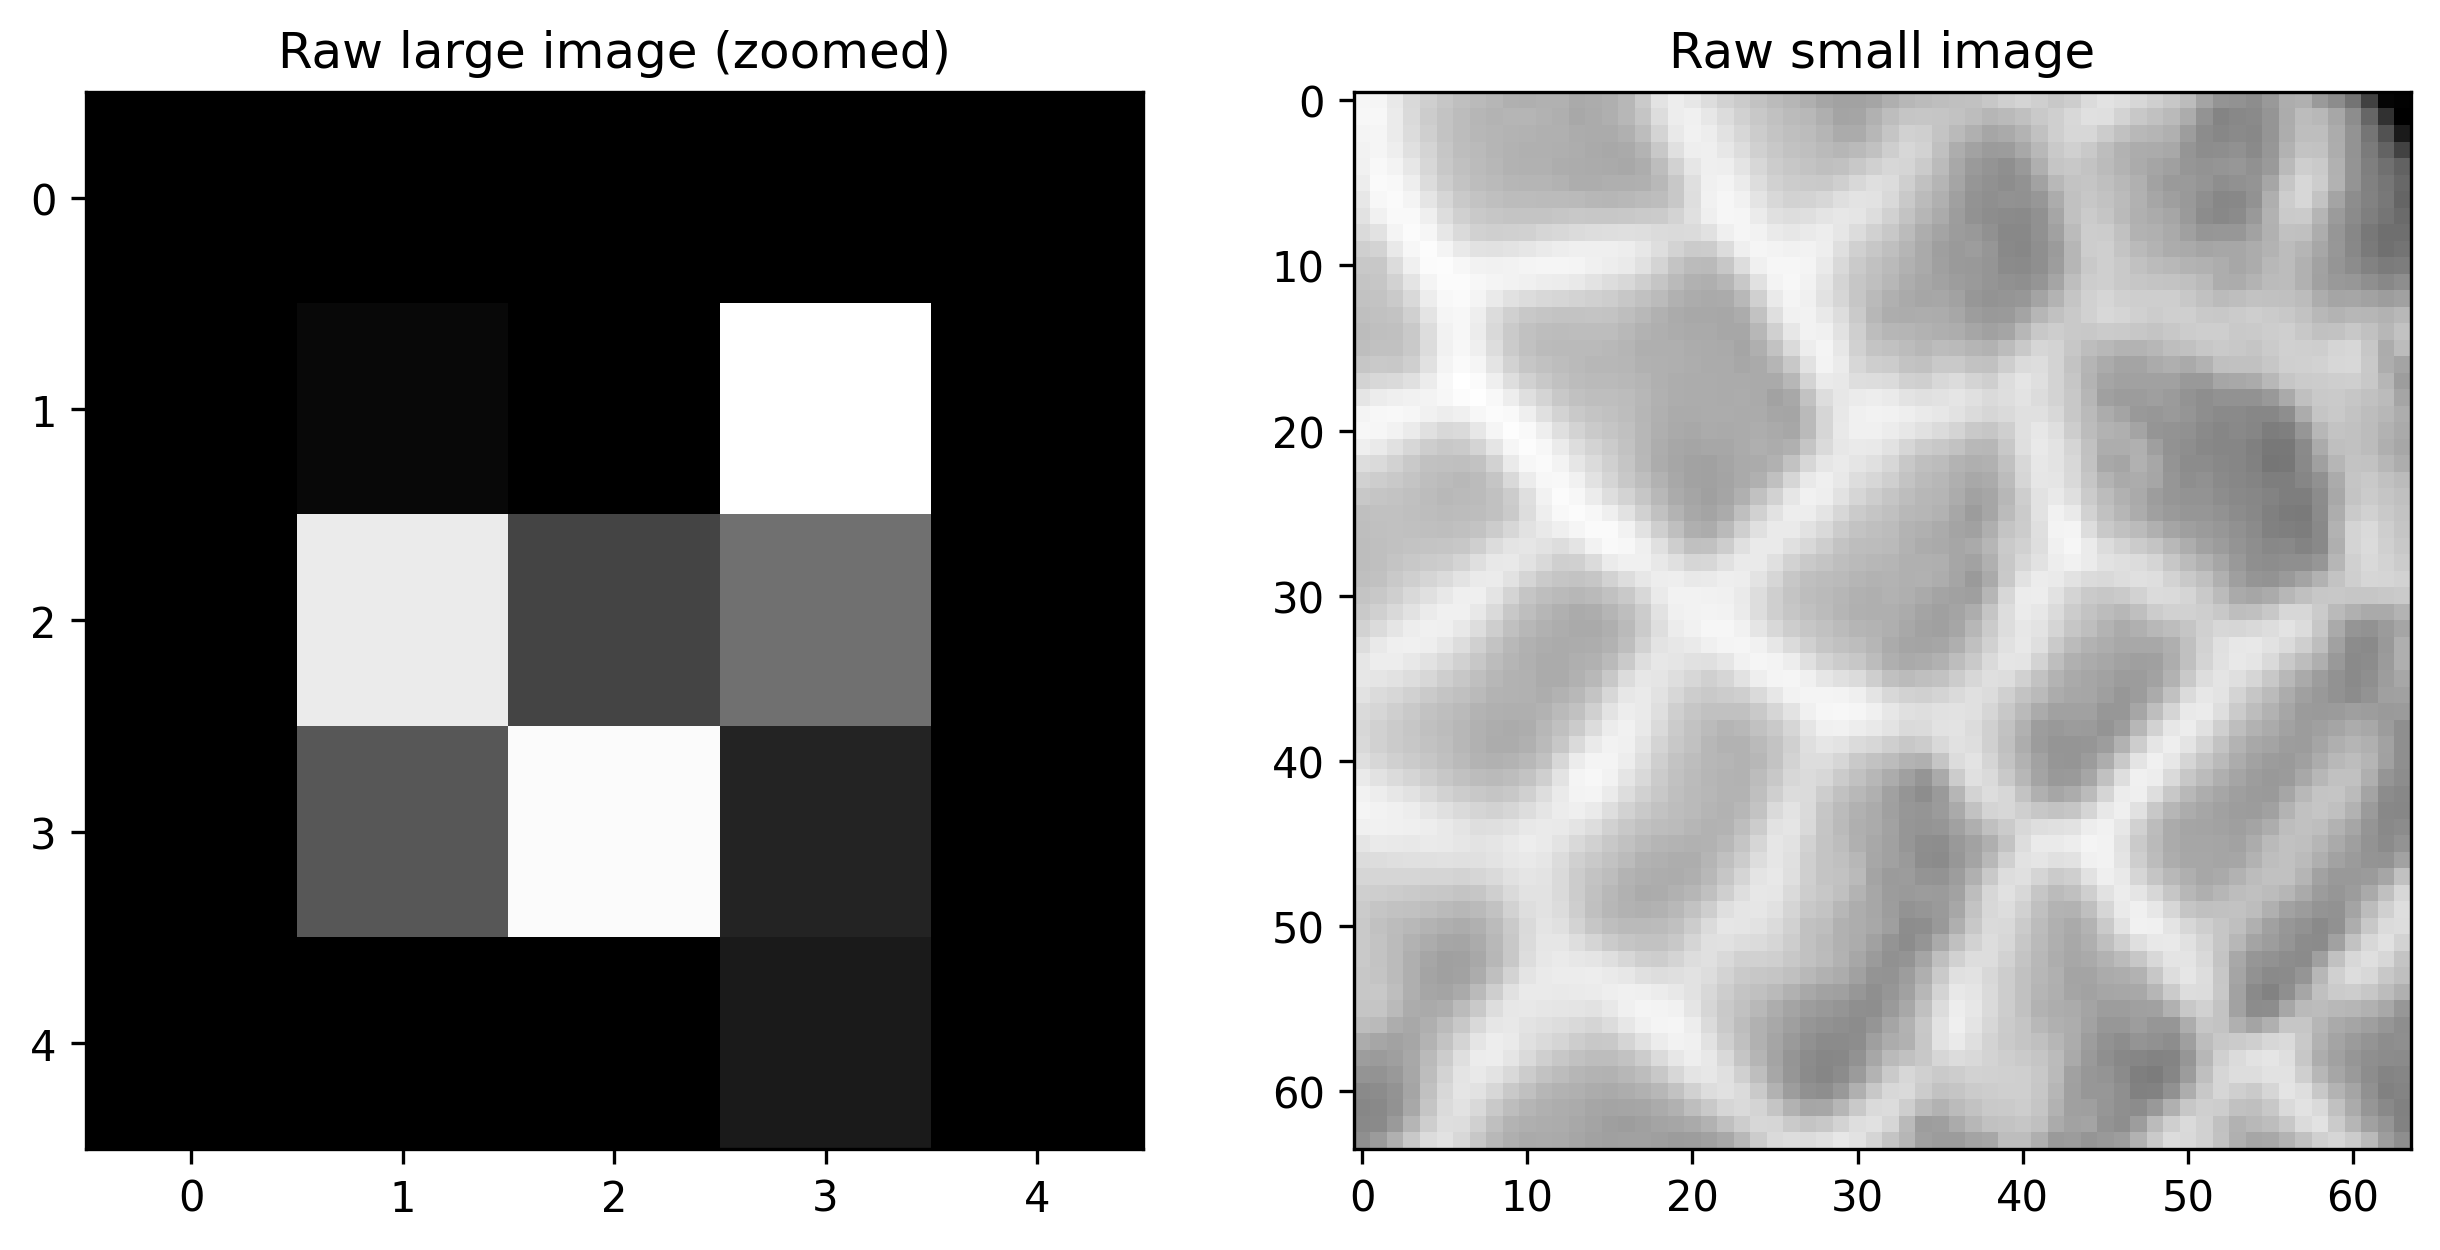

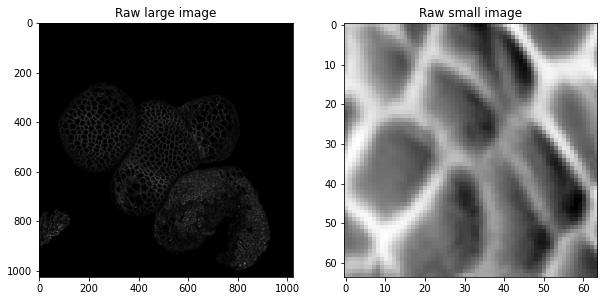

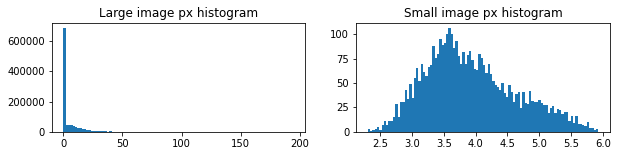

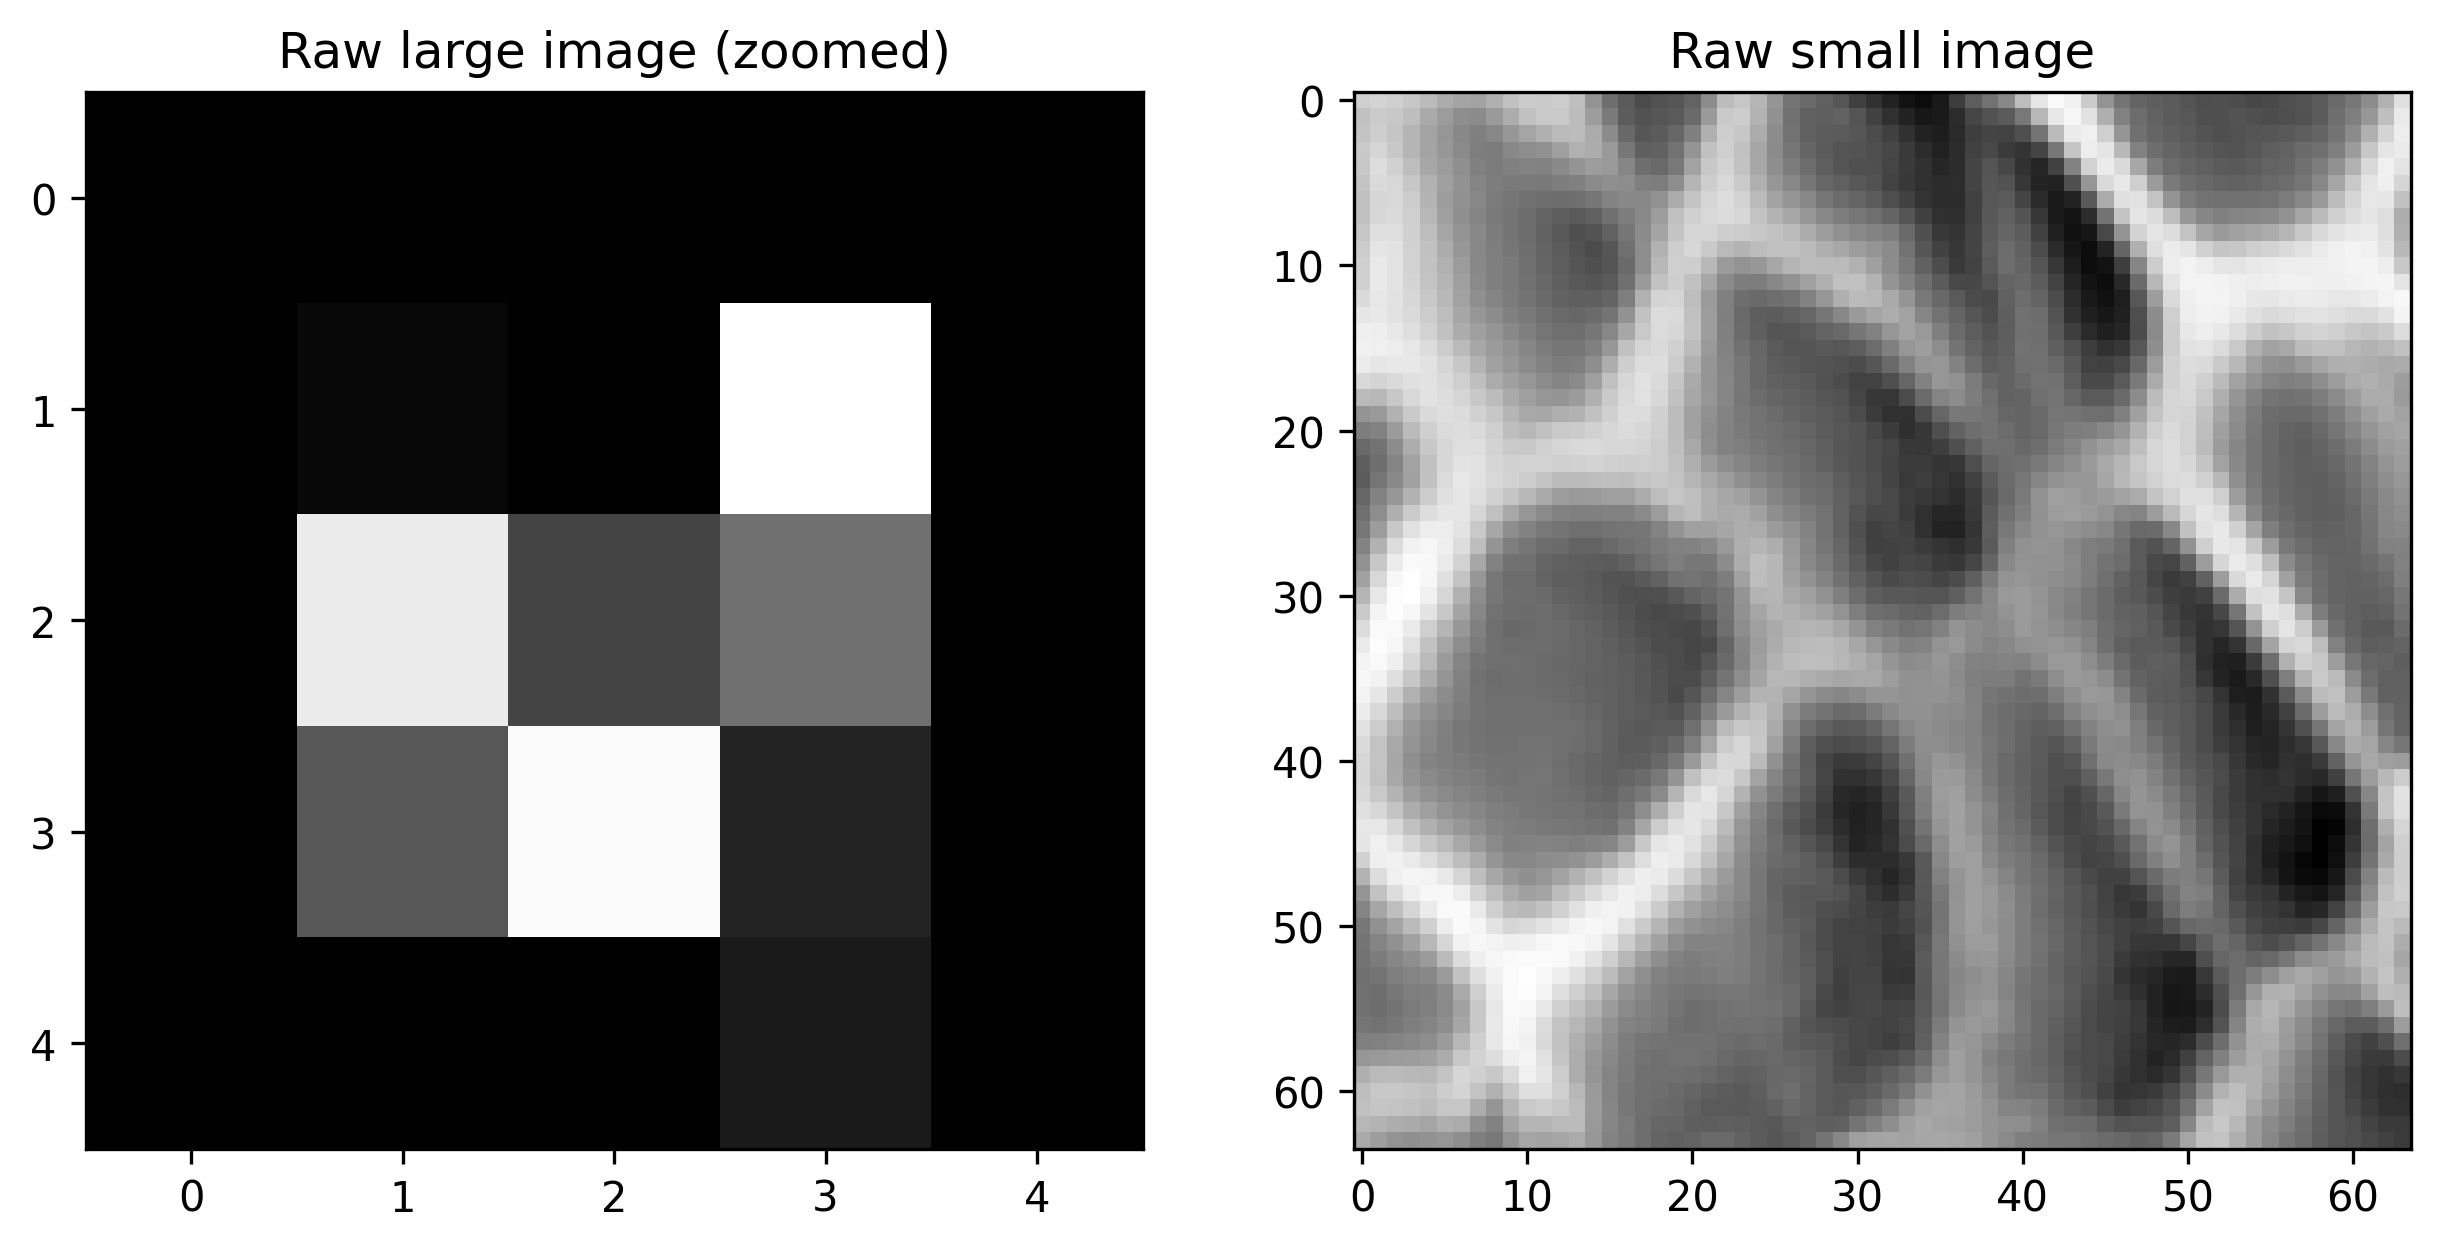

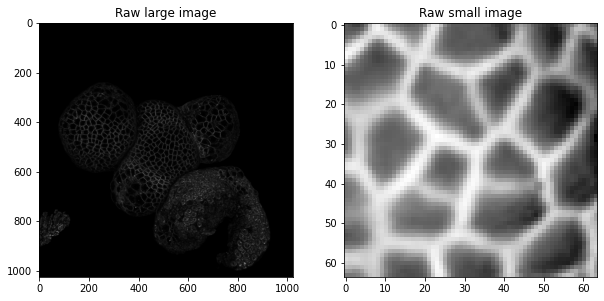

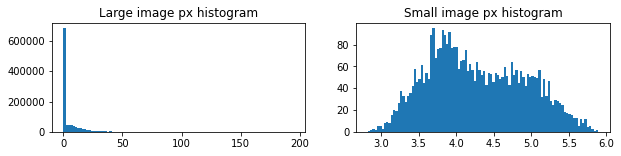

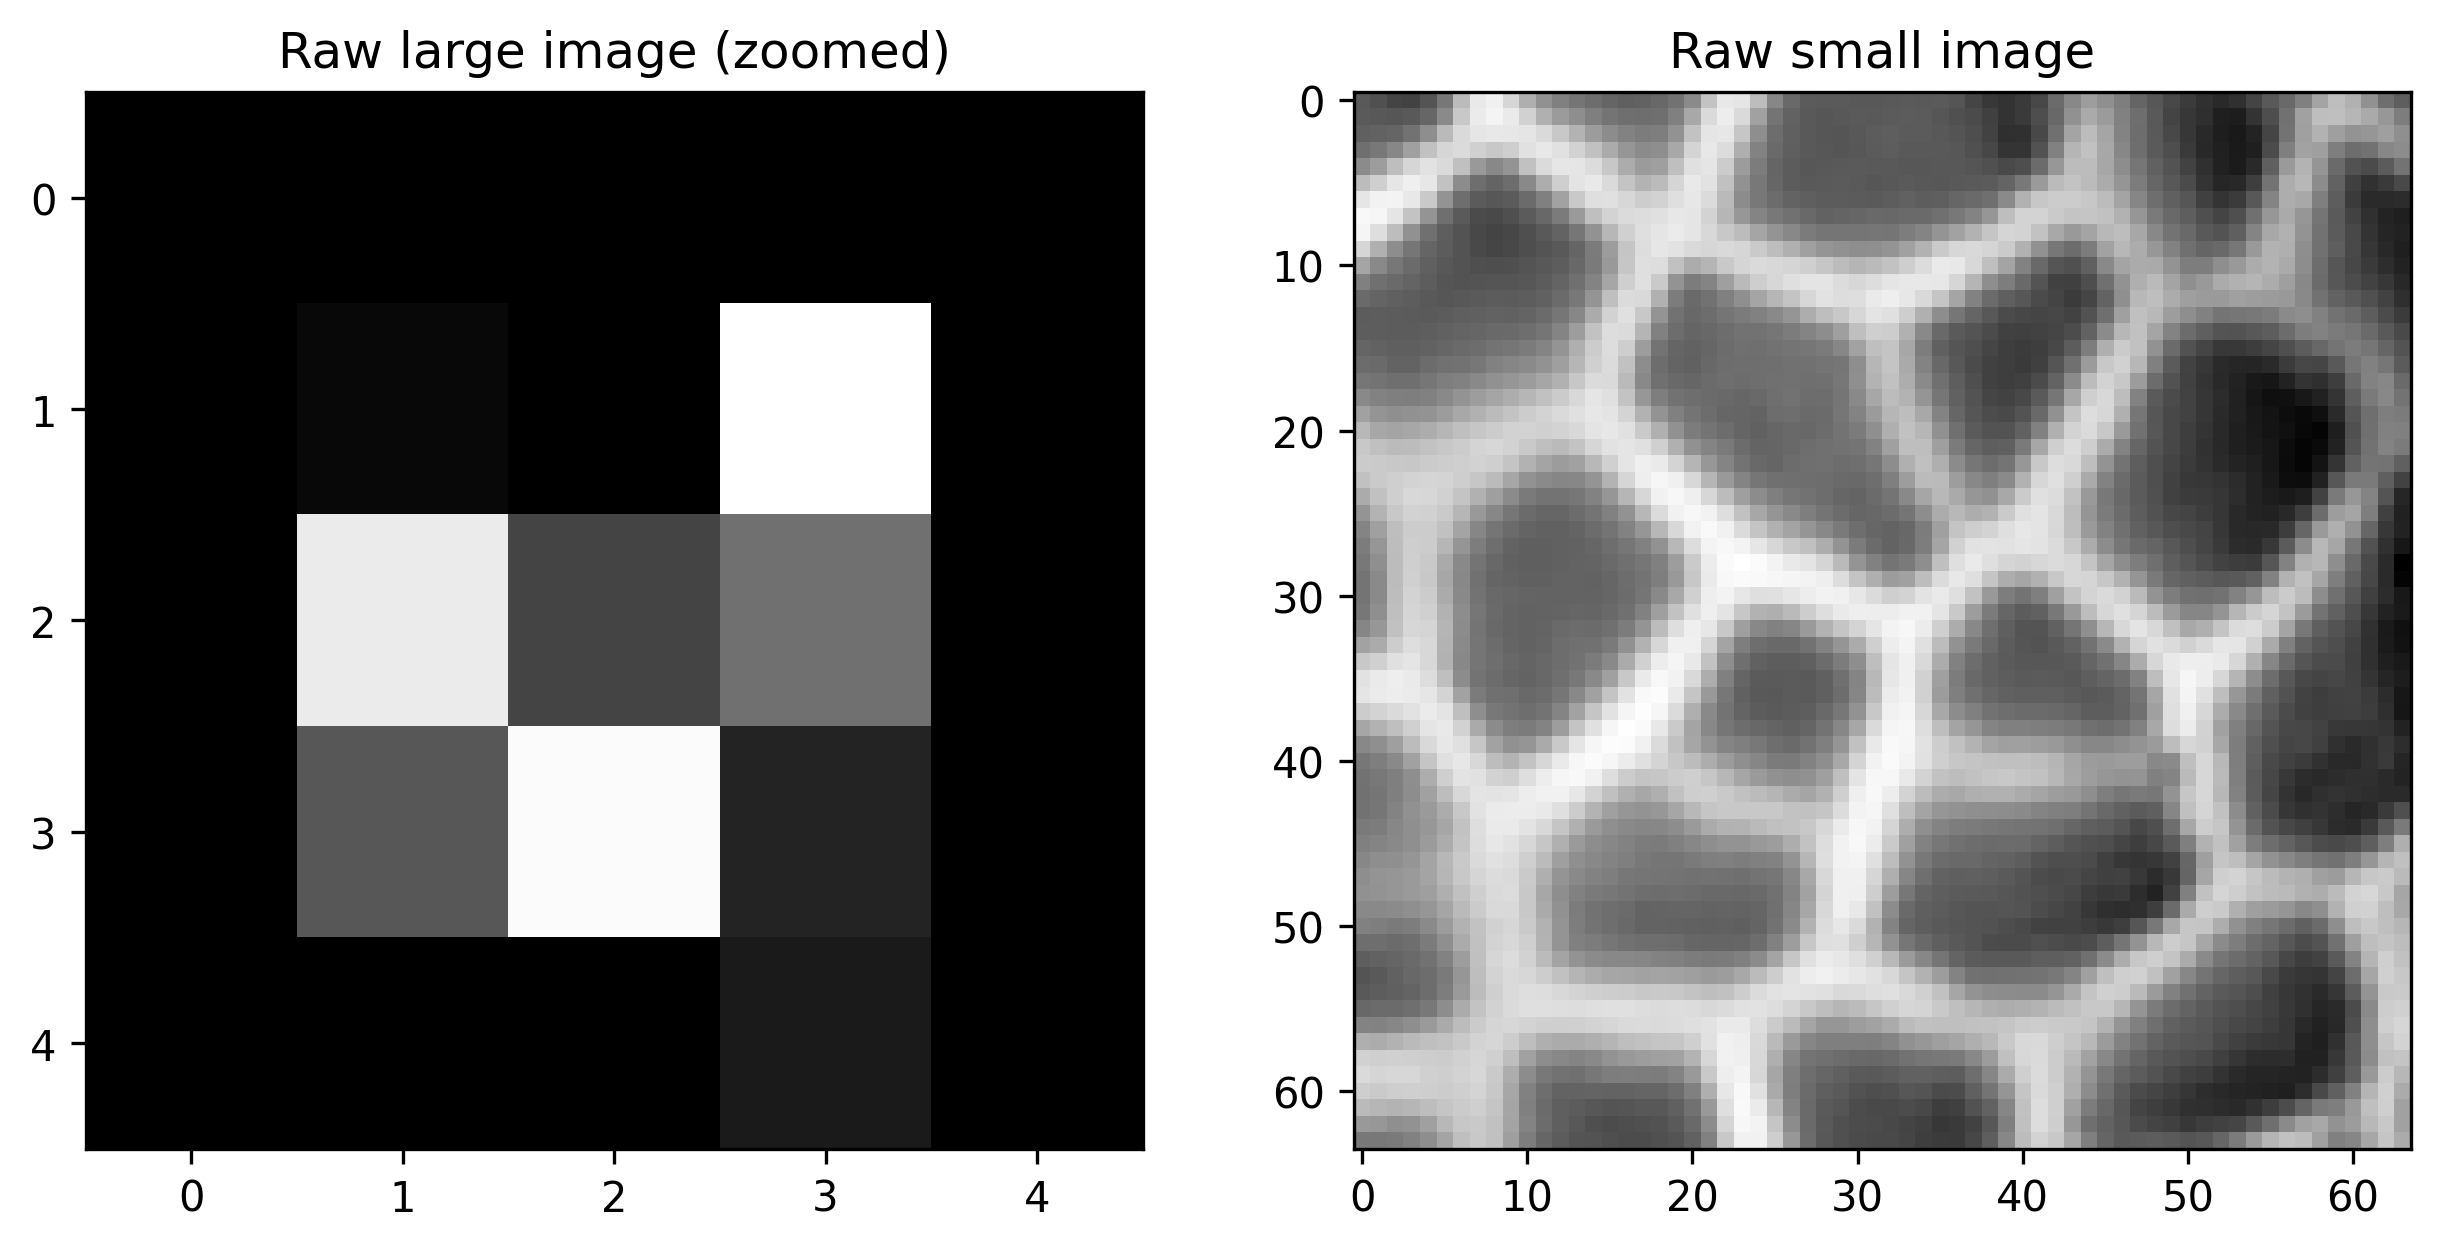

In [8]:

for im_small_np in all_im_small_np:
# plotting original images and their histograms
    _,axs = plt.subplots(1,2, figsize=(10,20))
    axs[0].imshow(im_large_np, cmap='Greys_r')
    axs[1].imshow(im_small_np, cmap='Greys_r')
    axs[0].set_title('Raw large image')
    axs[1].set_title('Raw small image')

    _,axs = plt.subplots(1,2, figsize=(10,2))
    axs[0].hist(im_large_np.flatten(), 100)
    axs[1].hist(im_small_np.flatten(), 100);
    axs[0].set_title('Large image px histogram')
    axs[1].set_title('Small image px histogram')

    _,axs = plt.subplots(1,2, figsize=(10,20), dpi=300)
    axs[0].imshow(im_large_np[100:(100+64*resc_rat):resc_rat, 100:(100+64*resc_rat):resc_rat], cmap='Greys_r')
    axs[1].imshow(im_small_np, cmap='Greys_r')
    axs[0].set_title('Raw large image (zoomed)')
    axs[1].set_title('Raw small image')



Text(0.5, 1.0, 'Truncated px histogram based on percentile threshold')

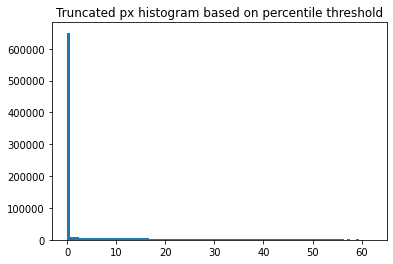

In [9]:


    var = local_variance_filter(im_large_np, radius=var_filt_radius)
    perc = np.percentile(var, perc_threshold)

    var_thr = var.copy()
    var_thr[var_thr < perc] = 0
    var_thr[var_thr >= perc] = 1

    plt.hist(var.flatten()[var.flatten()<perc], 100);
    plt.title('Truncated px histogram based on percentile threshold')



Text(0.5, 1.0, 'Binarised staurated variance')

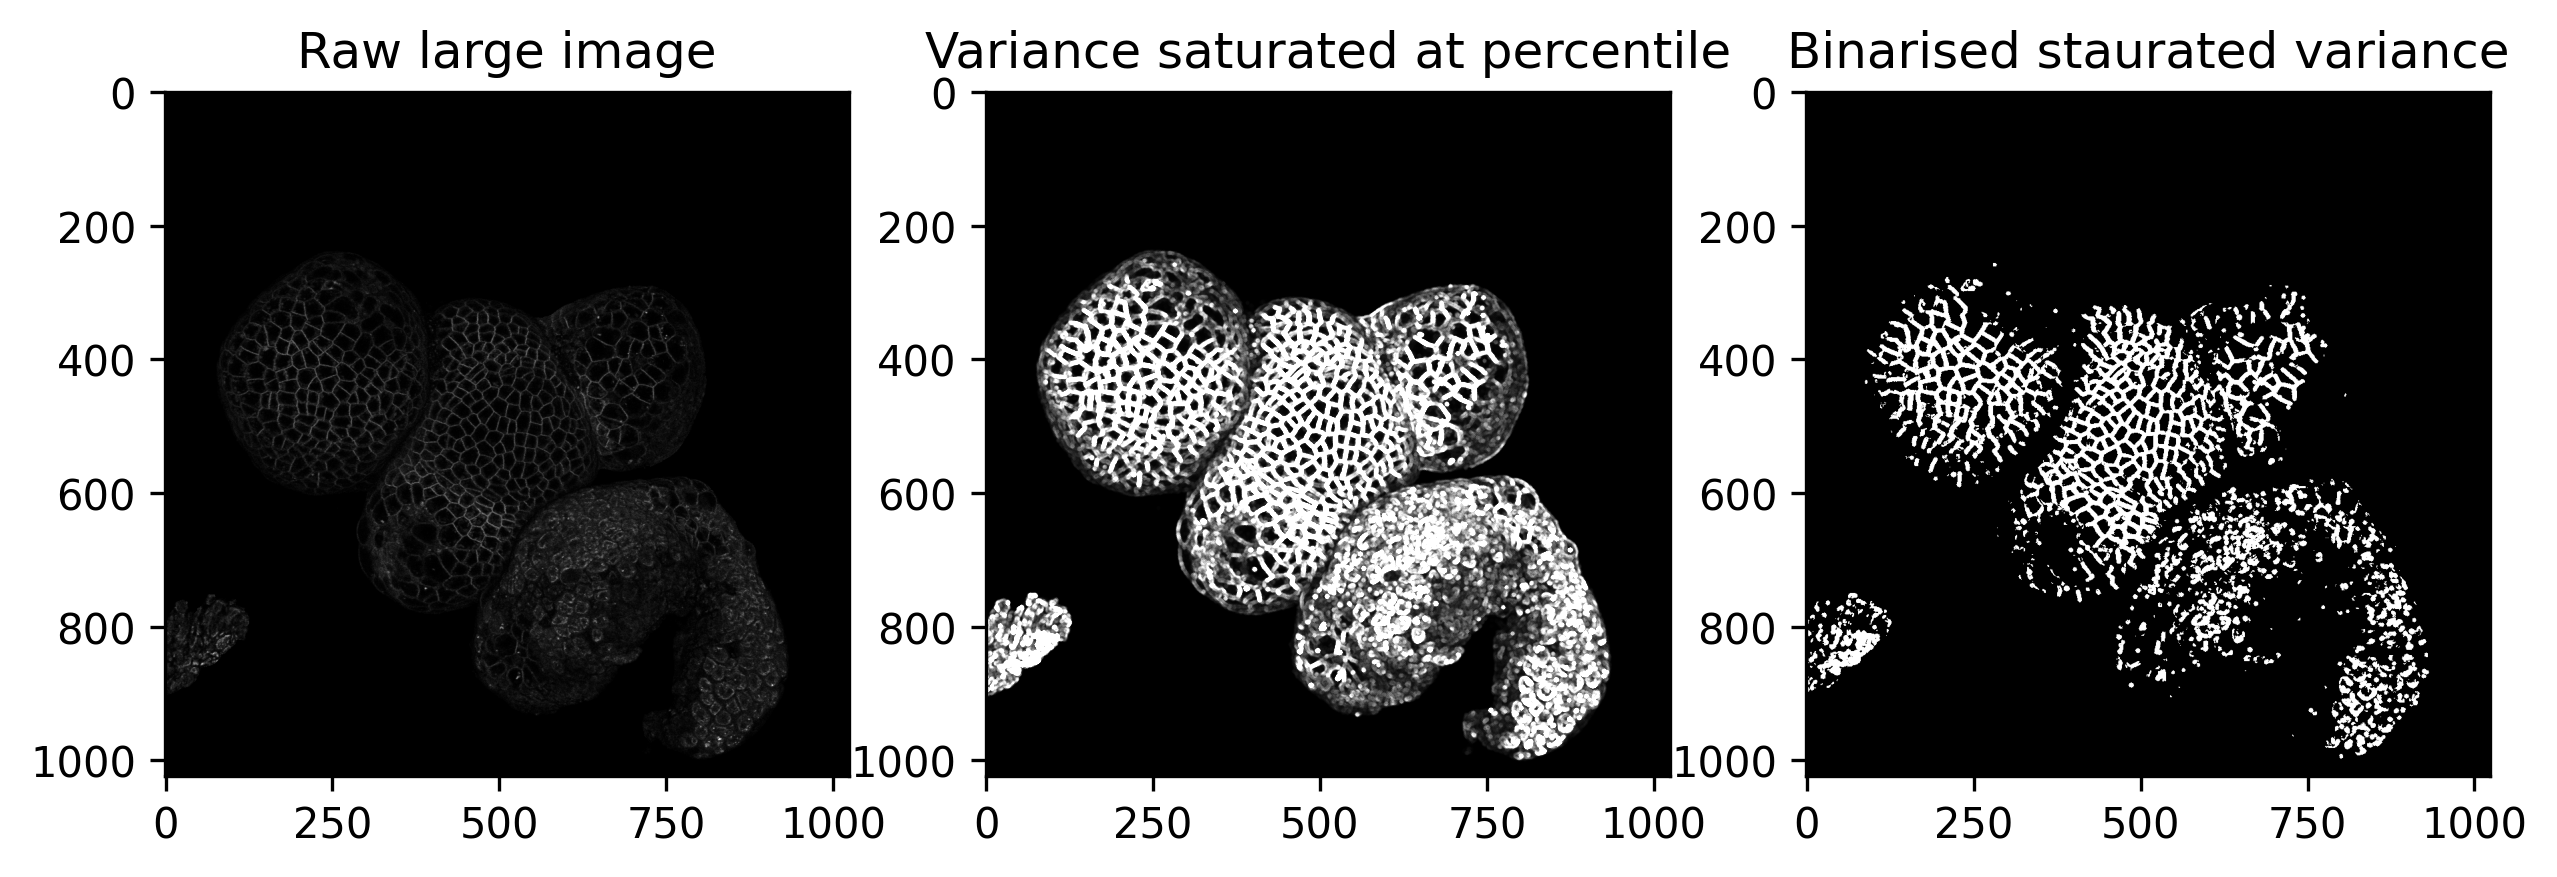

In [10]:


    _,axs = plt.subplots(1,3, figsize=(10,20), dpi=300)
    axs[0].imshow(im_large_np, cmap='Greys_r')
    axs[1].imshow(var, cmap='Greys_r', vmin=0, vmax=perc)
    axs[2].imshow(var_thr, cmap='Greys_r')

    axs[0].set_title('Raw large image')
    axs[1].set_title('Variance saturated at percentile')
    axs[2].set_title('Binarised staurated variance')



Text(0.5, 1.0, 'Binarised staurated variance (downsampled)')

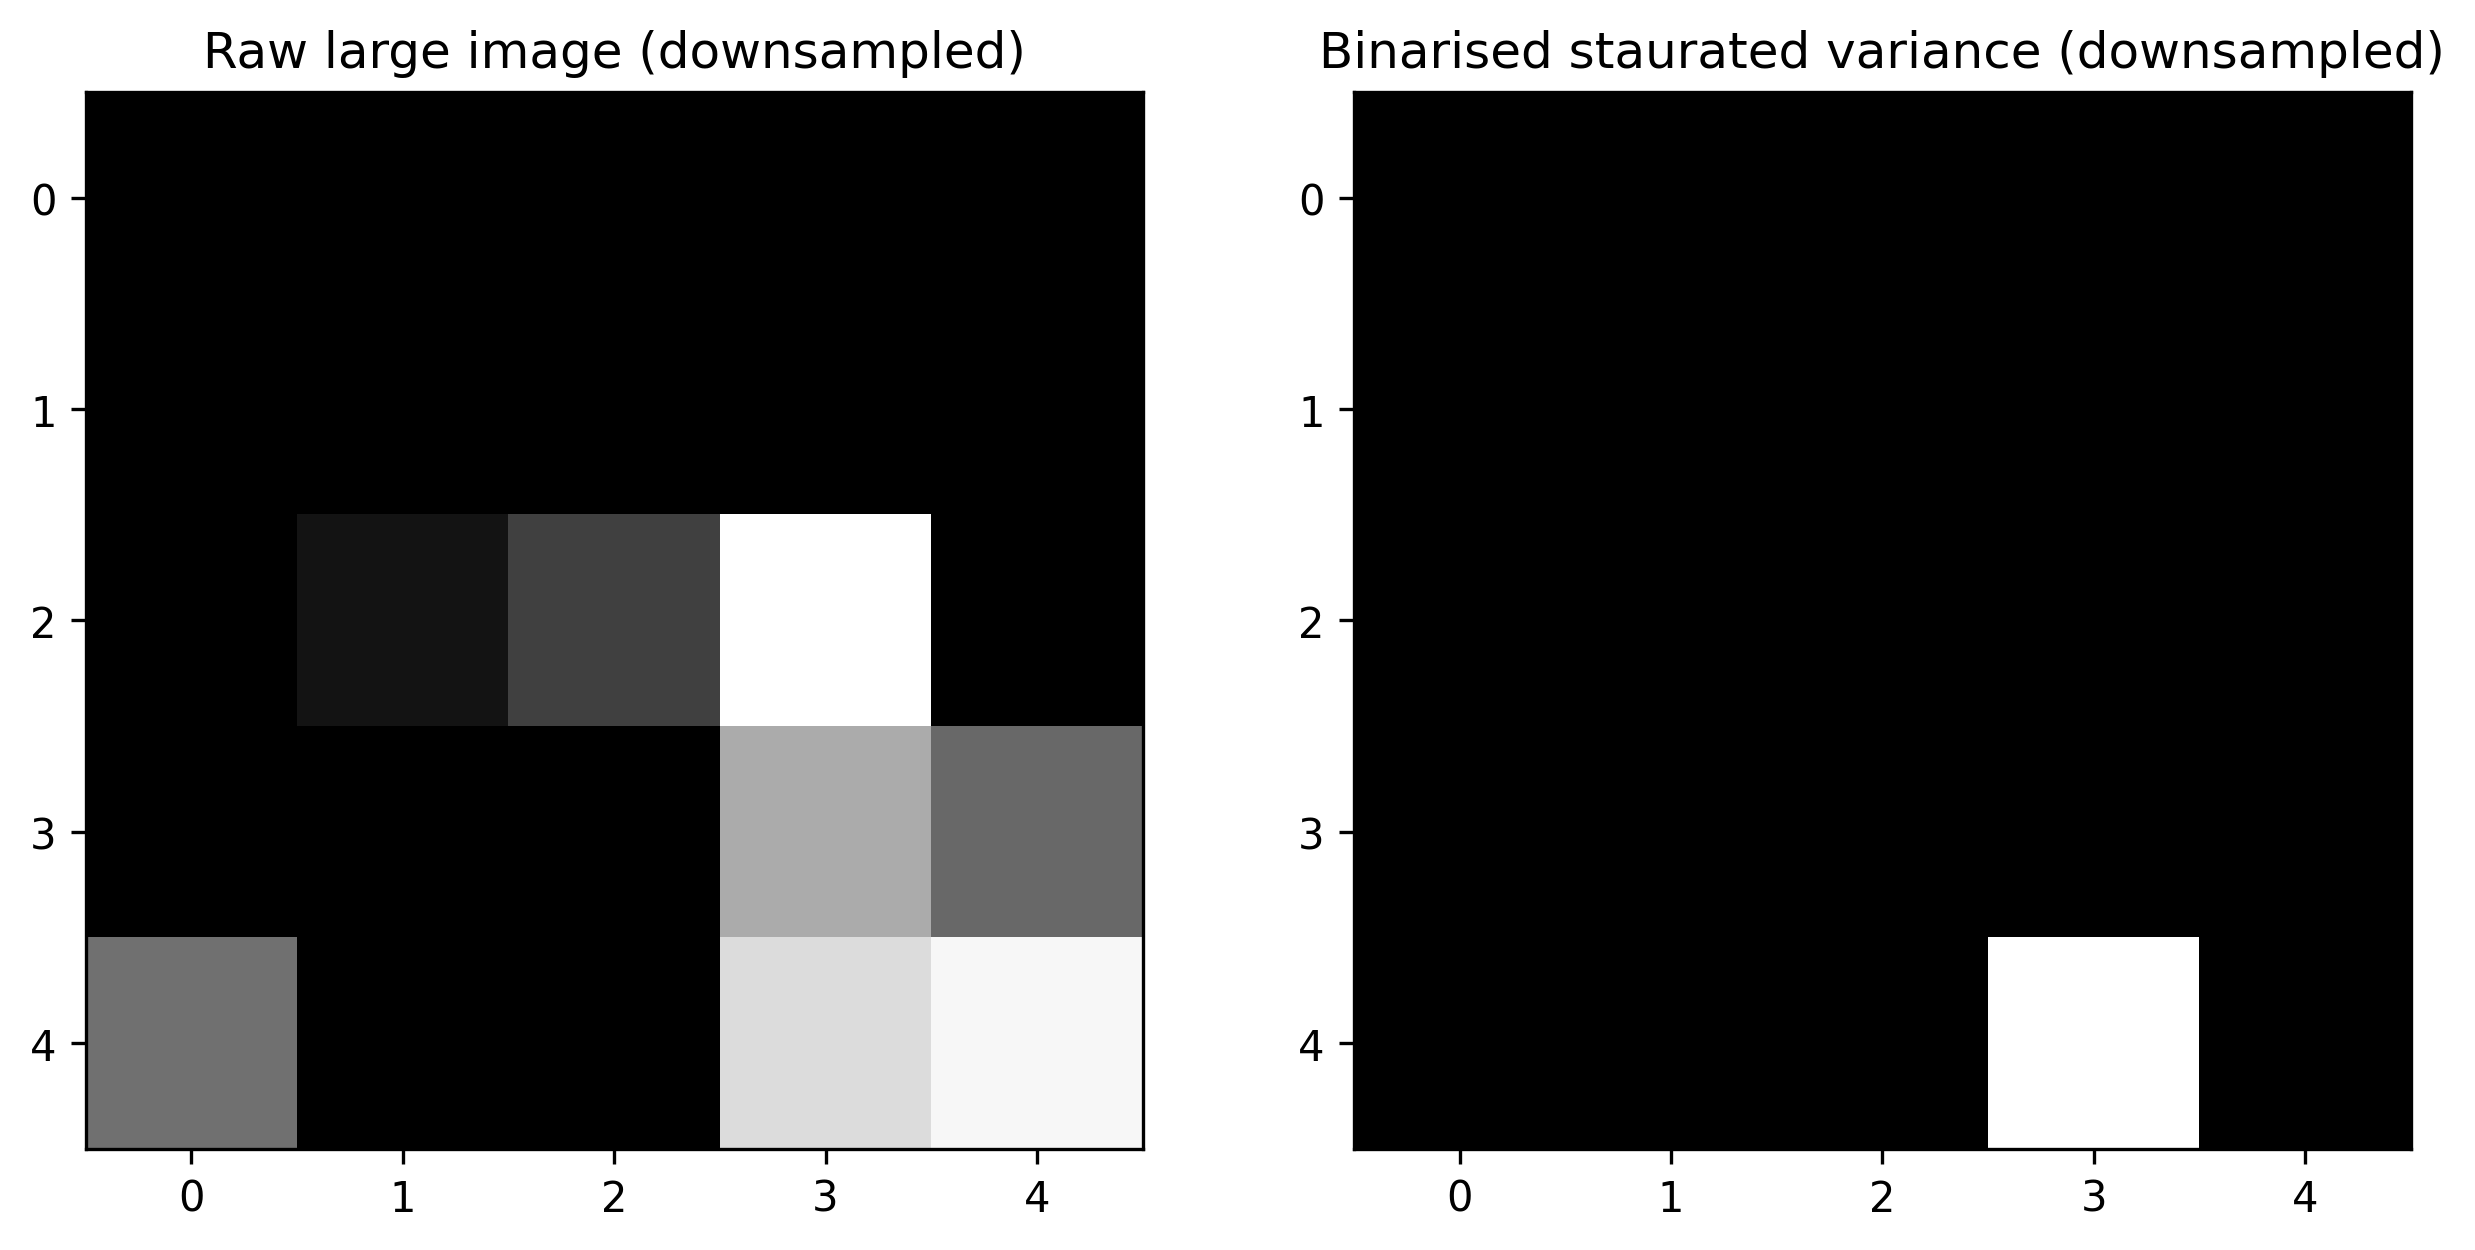

In [11]:
    var_thr_downs = var_thr[::resc_rat,::resc_rat]
    im_orig_downs = im_large_np[::resc_rat,::resc_rat]

    _,axs = plt.subplots(1,2, figsize=(10,20), dpi=300)
    axs[0].imshow(im_orig_downs, cmap='Greys_r')
    axs[1].imshow(var_thr_downs, cmap='Greys_r')

    axs[0].set_title('Raw large image (downsampled)')
    axs[1].set_title('Binarised staurated variance (downsampled)')

In [12]:
%timeit 
distance = distance_two_images(var_thr_downs, im_small_np)
res = position_of_min(distance)

ValueError: negative dimensions are not allowed

In [ ]:
plt.imshow(distance.T)
plt.scatter(res[0][0], res[1][0])
plt.title('Optimal shift of small image')

In [ ]:
im_small_np

In [ ]:
nonzero = np.where(im_small_np > thr_overlay_vis) # only for visualisation

plt.figure(dpi=300)
plt.imshow(im_orig_downs.T, cmap='Greys_r')
plt.scatter(res[1][0]+nonzero[1], res[0][0]+nonzero[0], alpha=0.02, c='red')
plt.title('Overlay of small image and large image')